In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from pathlib import Path
root=Path("data")
root.mkdir(exist_ok=True)
path = root / "Sleep_Health_and_Lifestyle_Dataset.csv"

In [3]:
data=pd.read_csv(path)
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
data.columns = data.columns.str.replace(' ', '_')
data

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
data.isnull().sum()

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [6]:
def plot_hist(data, bins=20, shrink=0.8, fig_size=(6, 3)):
    plt.figure(figsize=fig_size)   
    sns.histplot(data, bins=bins, shrink=shrink)    
    plt.xlabel(data.name)
    plt.ylabel("Count")
    plt.title(f"{data.name} Distribution")
    plt.show()

## Analysis  and Fix data

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Gender

In [8]:
data.groupby('Gender')['Gender'].unique() 

Gender
Female    [Female]
Male        [Male]
Name: Gender, dtype: object

In [9]:
len(data.groupby('Gender')['Gender'].unique())

2

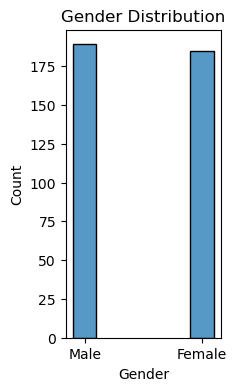

In [10]:
plot_hist(data["Gender"],bins=2,shrink=0.2,fig_size=(2, 4))

<Axes: xlabel='Gender', ylabel='Age'>

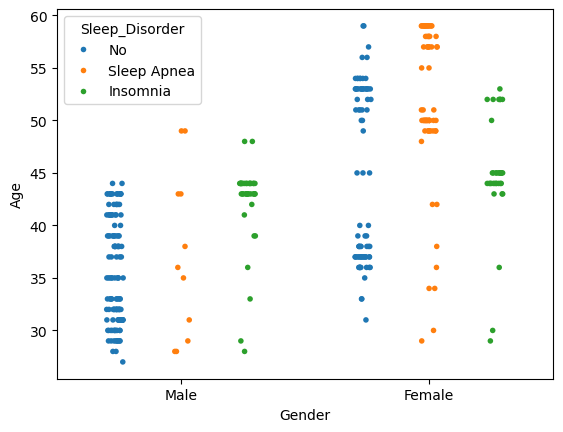

In [11]:
sns.stripplot(data=data,x="Gender",y='Age',hue="Sleep_Disorder",dodge=True,size=4)

<Axes: xlabel='Gender', ylabel='count'>

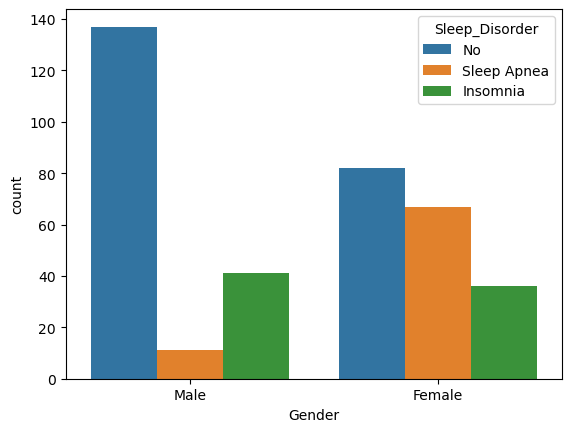

In [12]:
sns.countplot(data=data, x="Gender", hue="Sleep_Disorder")

In [13]:
lab=LabelEncoder()

In [14]:
data['Gender']=lab.fit_transform(data['Gender'])

In [15]:
data

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No
1,2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
2,3,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
3,4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,0,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Age

In [16]:
print("len:", len(data.groupby('Age')['Age'].count()))
data.groupby('Age')['Age'].count()

len: 31


Age
27     1
28     5
29    13
30    13
31    18
32    17
33    13
34     2
35    12
36    12
37    20
38    20
39    15
40     4
41    12
42     9
43    34
44    30
45    14
48     3
49    11
50    20
51     8
52     9
53    17
54     7
55     2
56     2
57     9
58     6
59    16
Name: Age, dtype: int64

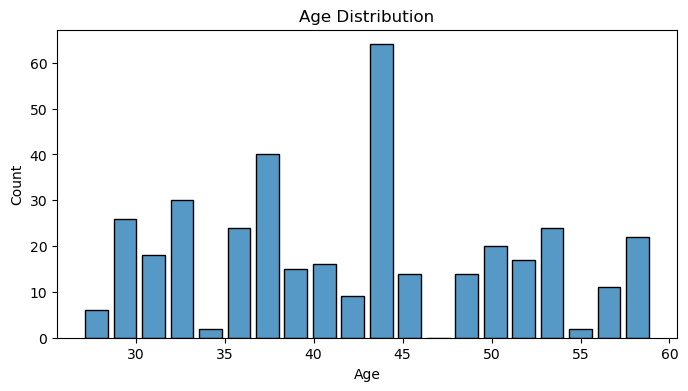

In [17]:
plot_hist(data["Age"],bins=20,shrink=0.8,fig_size=(8,4))

### Occupation

In [18]:
print("len:", len(data.groupby('Occupation')['Occupation'].count()))
data.groupby('Occupation')['Occupation'].count()

len: 11


Occupation
Accountant              37
Doctor                  71
Engineer                63
Lawyer                  47
Manager                  1
Nurse                   73
Sales Representative     2
Salesperson             32
Scientist                4
Software Engineer        4
Teacher                 40
Name: Occupation, dtype: int64

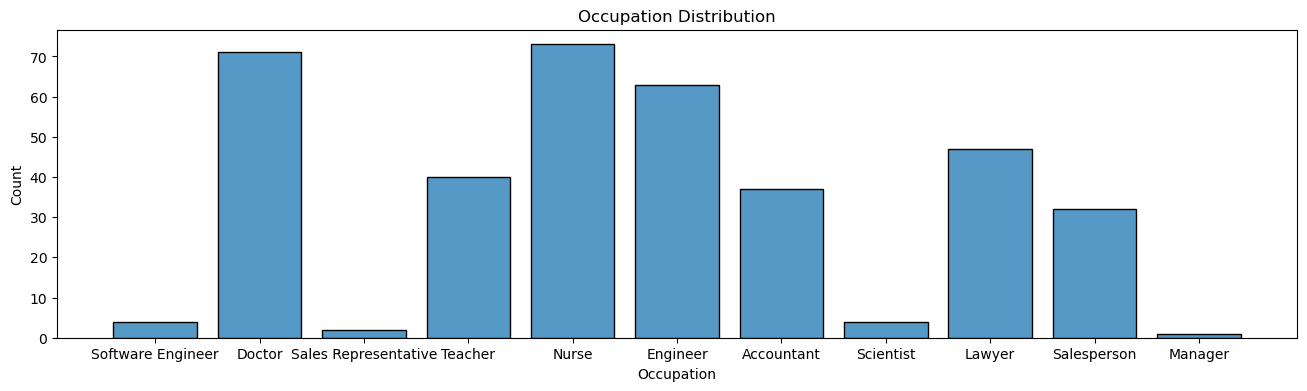

In [19]:
plot_hist(data["Occupation"],bins=11,shrink=0.8,fig_size=(16,4))

fix

In [20]:
jobs_by_domain = {

    "healthcare_life_sciences": [
        "doctor", "medical doctor", "physician", "general doctor",
        "surgeon", "specialist doctor",
        "nurse", "staff nurse", "registered nurse", "nursing officer",
        "nurse practitioner", "midwife",
        "medical officer",
        "pharmacist", "medical pharmacist",
        "dentist", "dental surgeon",
        "veterinarian",
        "physiotherapist", "physical therapist",
        "occupational therapist",
        "radiologist", "radiology technician",
        "pathologist", "lab technician", "medical lab technician",
        "anesthesiologist",
        "psychiatrist", "psychologist", "clinical psychologist",
        "biomedical scientist",
        "medical scientist",
        "life scientist",
        "clinical researcher", "medical researcher",
        "epidemiologist",
        "public health officer",
        "biologist", "microbiologist",
        "geneticist", "bioinformatician",
        "medical coder", "medical biller",
        "healthcare manager", "hospital manager",
        "healthcare administrator",
        "medical device engineer",
        "pharmaceutical scientist",
        "health data analyst"
    ],

    "engineering_technology": [
        "engineer", "engineering professional",
        "software engineer", "software developer", "programmer", "coder",
        "computer engineer",
        "backend developer", "frontend developer", "full stack developer",
        "machine learning engineer", "ai engineer",
        "data scientist", "data engineer", "data analyst",
        "research engineer",
        "electrical engineer", "electronics engineer",
        "mechanical engineer",
        "civil engineer",
        "aerospace engineer",
        "robotics engineer",
        "embedded engineer", "embedded systems engineer",
        "devops engineer", "site reliability engineer",
        "cloud engineer",
        "cybersecurity engineer", "security analyst",
        "network engineer",
        "systems engineer",
        "it engineer", "it specialist",
        "game developer",
        "blockchain engineer",
        "firmware engineer",
        "qa engineer", "test engineer",
        "engineering manager",
        "technical lead",
        "cto", "chief technology officer"
    ],

    "education_research": [
        "teacher", "school teacher", "high school teacher",
        "lecturer",
        "professor", "assistant professor", "associate professor",
        "tutor", "private tutor",
        "educator",
        "researcher", "scientist", "research scientist",
        "academic researcher",
        "phd researcher", "doctoral scholar",
        "postdoctoral researcher",
        "educationist",
        "curriculum developer",
        "instructional designer",
        "education consultant",
        "special education teacher",
        "teaching assistant",
        "online educator",
        "edtech specialist",
        "academic coordinator",
        "school principal",
        "dean",
        "education policy analyst"
    ],

    "business_finance_administration": [
        "accountant", "senior accountant",
        "chartered accountant",
        "finance professional",
        "financial analyst",
        "investment analyst",
        "business analyst",
        "business manager",
        "operations manager",
        "general manager",
        "manager",
        "project manager",
        "program manager",
        "product manager",
        "management consultant",
        "auditor",
        "risk analyst",
        "economist",
        "hr manager", "human resources manager",
        "hr executive", "recruiter",
        "payroll officer",
        "office administrator",
        "administrative officer",
        "corporate manager",
        "strategy manager",
        "compliance officer",
        "chief financial officer",
        "chief operating officer"
    ],

    "legal_governance": [
        "lawyer", "advocate", "attorney",
        "legal professional",
        "corporate lawyer",
        "criminal lawyer",
        "civil lawyer",
        "legal advisor",
        "legal consultant",
        "judge",
        "magistrate",
        "public prosecutor",
        "legal researcher",
        "law researcher",
        "paralegal",
        "company secretary",
        "compliance manager",
        "policy analyst",
        "government legal officer",
        "intellectual property lawyer",
        "patent lawyer"
    ],

    "sales_marketing_commerce": [
        "salesperson", "sales person",
        "sales representative", "sales executive",
        "sales associate",
        "sales manager",
        "business development executive",
        "business development manager",
        "marketing executive",
        "marketing manager",
        "digital marketer",
        "seo specialist",
        "content marketer",
        "brand manager",
        "product marketing manager",
        "growth marketer",
        "market research analyst",
        "retail salesperson",
        "e-commerce manager",
        "retail manager",
        "merchandising executive",
        "crm executive",
        "customer relationship manager",
        "customer success manager"
    ],

    "transportation_logistics": [
        "logistics executive",
        "logistics manager",
        "supply chain executive",
        "supply chain manager",
        "warehouse supervisor",
        "warehouse manager",
        "inventory controller",
        "procurement officer",
        "fleet manager",
        "transportation coordinator",
        "shipping executive",
        "customs broker",
        "freight forwarder",
        "truck driver",
        "delivery driver",
        "commercial driver",
        "pilot",
        "air traffic controller",
        "railway officer",
        "maritime officer"
    ],

    "construction_infrastructure_skilled_trades": [
        "construction worker",
        "construction engineer",
        "construction manager",
        "site engineer",
        "structural engineer",
        "architect",
        "urban planner",
        "surveyor",
        "quantity surveyor",
        "electrician",
        "plumber",
        "welder",
        "carpenter",
        "mason",
        "hvac technician",
        "heavy equipment operator",
        "safety supervisor",
        "building inspector",
        "facilities manager"
    ],

    "manufacturing_industrial_production": [
        "factory worker",
        "production worker",
        "production engineer",
        "manufacturing engineer",
        "plant manager",
        "operations supervisor",
        "industrial engineer",
        "process engineer",
        "maintenance engineer",
        "quality inspector",
        "quality control engineer",
        "quality assurance manager",
        "machine operator",
        "cnc operator",
        "machinist",
        "automation engineer",
        "robotics technician"
    ],

    "agriculture_natural_resources": [
        "farmer",
        "agricultural worker",
        "agricultural scientist",
        "agronomist",
        "soil scientist",
        "horticulturist",
        "plant scientist",
        "animal scientist",
        "veterinary officer",
        "fisheries officer",
        "forestry officer",
        "environmental scientist",
        "ecologist",
        "geologist",
        "mining engineer",
        "renewable energy expert",
        "sustainability specialist"
    ],

    "arts_media_entertainment_sports": [
        "artist",
        "visual artist",
        "graphic designer",
        "ui designer",
        "ux designer",
        "animator",
        "illustrator",
        "film director",
        "film producer",
        "actor",
        "video editor",
        "journalist",
        "reporter",
        "content creator",
        "influencer",
        "music artist",
        "music producer",
        "sound engineer",
        "sports person",
        "athlete",
        "coach",
        "sports analyst"
    ],

    "public_service_defense": [
        "government officer",
        "civil servant",
        "administrative officer",
        "policy officer",
        "defense scientist",
        "military officer",
        "army officer",
        "navy officer",
        "air force officer",
        "police officer",
        "law enforcement officer",
        "firefighter",
        "security officer",
        "intelligence analyst",
        "cyber defense analyst",
        "public safety officer"
    ],

    "hospitality_tourism_personal_services": [
        "hotel staff",
        "hotel manager",
        "front desk executive",
        "guest relations executive",
        "travel agent",
        "tour guide",
        "event manager",
        "restaurant manager",
        "chef",
        "cook",
        "baker",
        "housekeeping staff",
        "spa therapist",
        "wellness coach",
        "fitness trainer",
        "personal trainer",
        "salon professional"
    ],

    "informal_gig_independent_work": [
        "freelancer",
        "independent worker",
        "self-employed professional",
        "consultant",
        "independent consultant",
        "gig worker",
        "content writer",
        "copywriter",
        "freelance developer",
        "freelance designer",
        "online tutor",
        "youtuber",
        "podcaster",
        "blogger",
        "social media manager",
        "virtual assistant",
        "independent researcher",
        "startup founder",
        "entrepreneur",
        "solopreneur"
    ]
}


In [21]:
def get_job_domain(text, jobs_by_domain=jobs_by_domain):
    text = text.lower()
    for domain, roles in jobs_by_domain.items():
        for role in roles:
            if role in text:
                return domain
    return None

In [22]:
print(get_job_domain("Sales Representative"))

sales_marketing_commerce


In [23]:
print(get_job_domain("Salesperson"))

sales_marketing_commerce


In [24]:
print(get_job_domain("I am a hard working Salesperson"))

sales_marketing_commerce


In [25]:
data["Occupation"]=data["Occupation"].apply(get_job_domain)

In [26]:
data

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,1,27,engineering_technology,6.1,6,42,6,Overweight,126/83,77,4200,No
1,2,1,28,healthcare_life_sciences,6.2,6,60,8,Normal,125/80,75,10000,No
2,3,1,28,healthcare_life_sciences,6.2,6,60,8,Normal,125/80,75,10000,No
3,4,1,28,sales_marketing_commerce,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,sales_marketing_commerce,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,healthcare_life_sciences,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,0,59,healthcare_life_sciences,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,0,59,healthcare_life_sciences,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,0,59,healthcare_life_sciences,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [27]:
data['Occupation'].isnull().sum()

np.int64(0)

In [28]:
data.groupby('Occupation')['Occupation'].count()

Occupation
business_finance_administration     38
education_research                  44
engineering_technology              67
healthcare_life_sciences           144
legal_governance                    47
sales_marketing_commerce            34
Name: Occupation, dtype: int64

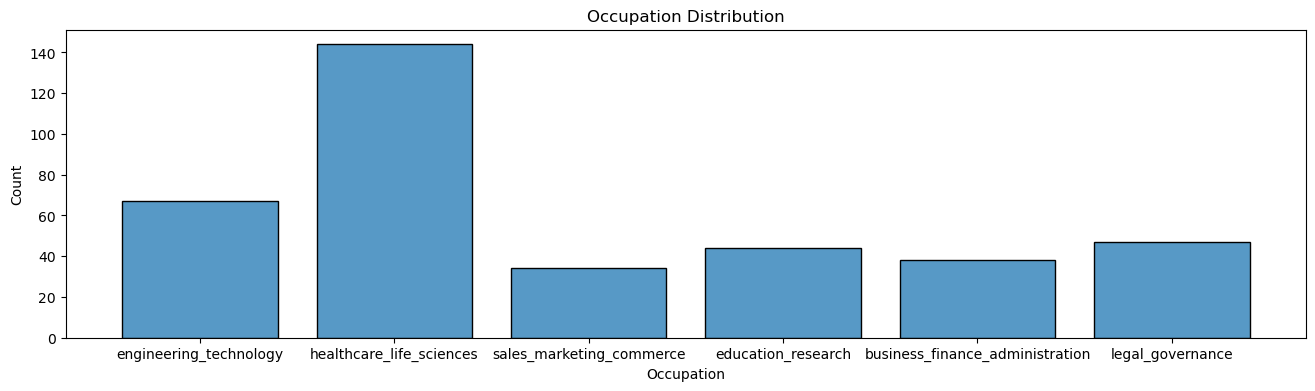

In [29]:
plot_hist(data["Occupation"],bins=11,shrink=0.8,fig_size=(16,4))

<Axes: xlabel='Occupation', ylabel='count'>

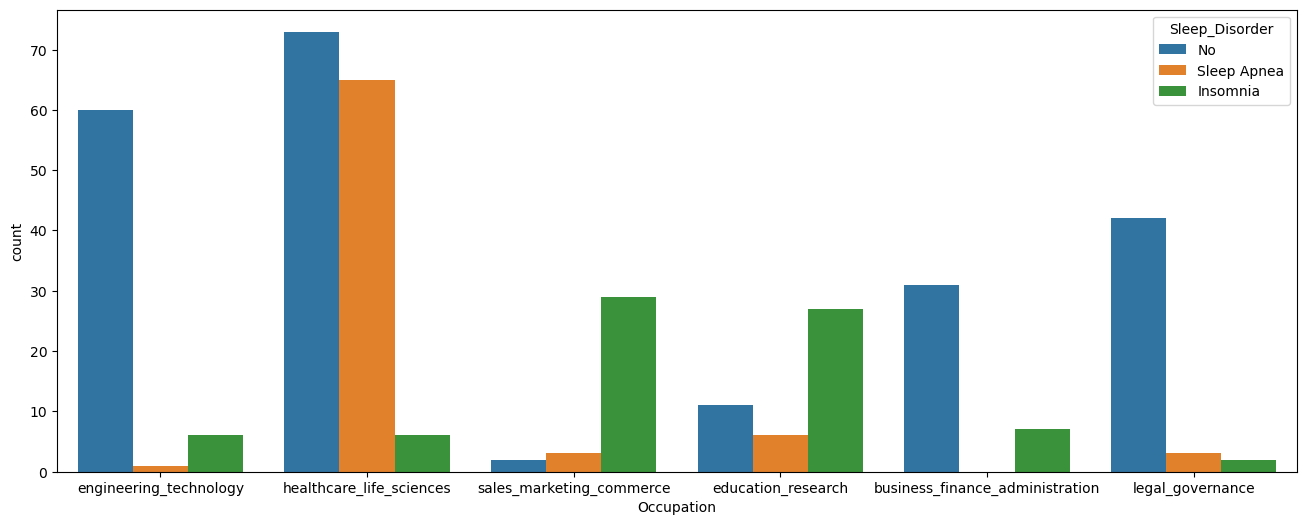

In [30]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Occupation", hue="Sleep_Disorder")

In [31]:
data["Occupation"]=lab.fit_transform(data["Occupation"])

In [32]:
job_dict = dict(zip(lab.classes_, lab.transform(lab.classes_)))
job_dict

{'business_finance_administration': np.int64(0),
 'education_research': np.int64(1),
 'engineering_technology': np.int64(2),
 'healthcare_life_sciences': np.int64(3),
 'legal_governance': np.int64(4),
 'sales_marketing_commerce': np.int64(5)}

In [33]:
data

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,1,27,2,6.1,6,42,6,Overweight,126/83,77,4200,No
1,2,1,28,3,6.2,6,60,8,Normal,125/80,75,10000,No
2,3,1,28,3,6.2,6,60,8,Normal,125/80,75,10000,No
3,4,1,28,5,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,5,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,3,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,0,59,3,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,0,59,3,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,0,59,3,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Sleep_Duration

In [34]:
print("len:", len(data.groupby('Sleep_Duration')['Sleep_Duration'].count()))
data.groupby('Sleep_Duration')['Sleep_Duration'].count()

len: 27


Sleep_Duration
5.8     2
5.9     4
6.0    31
6.1    25
6.2    12
6.3    13
6.4     9
6.5    26
6.6    20
6.7     5
6.8     5
6.9     3
7.1    19
7.2    36
7.3    14
7.4     5
7.5     5
7.6    10
7.7    24
7.8    28
7.9     7
8.0    13
8.1    15
8.2    11
8.3     5
8.4    14
8.5    13
Name: Sleep_Duration, dtype: int64

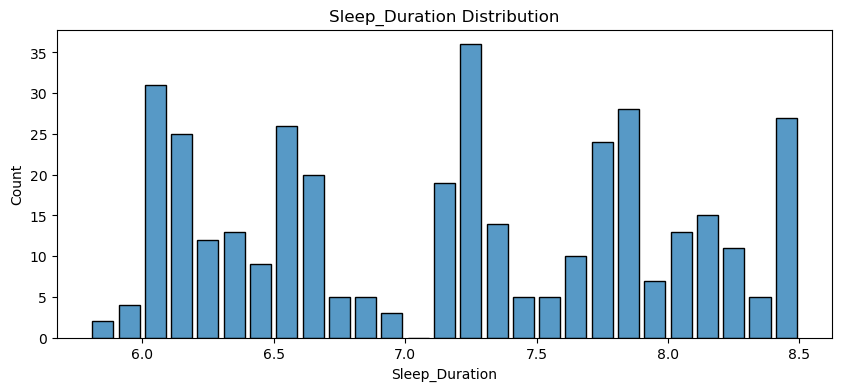

In [35]:
plot_hist(data["Sleep_Duration"],bins=27,shrink=0.8,fig_size=(10,4))

<Axes: xlabel='Sleep_Duration', ylabel='count'>

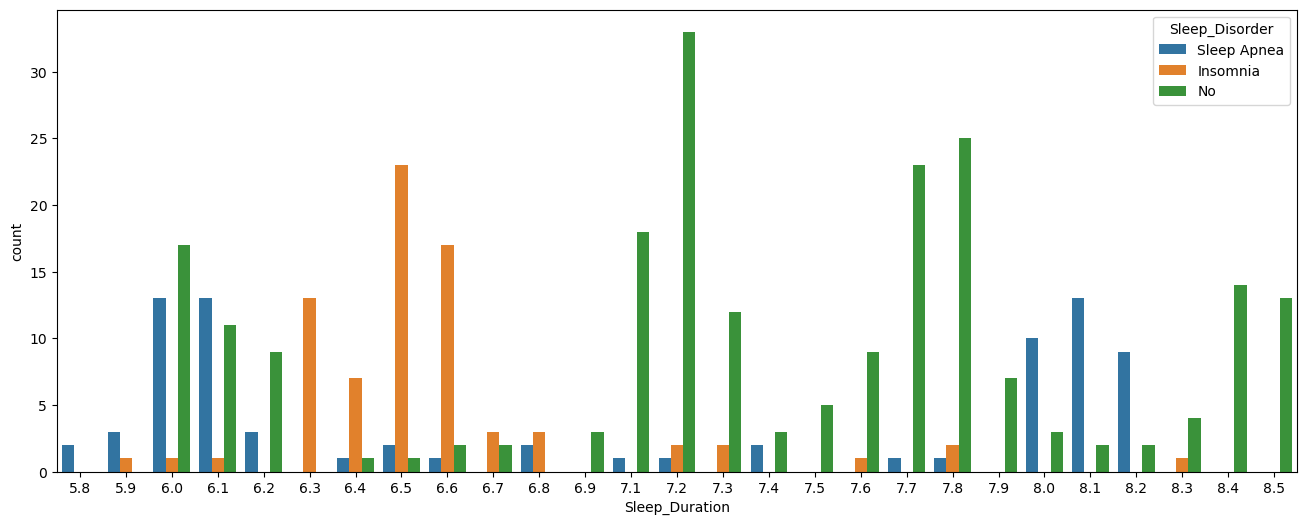

In [36]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Sleep_Duration", hue="Sleep_Disorder")

### Physical_Activity_Level

In [37]:
print("len:", len(data.groupby('Physical_Activity_Level')['Physical_Activity_Level'].count()))
data.groupby('Physical_Activity_Level')['Physical_Activity_Level'].count()

len: 16


Physical_Activity_Level
30    68
32     2
35     4
40     6
42     2
45    68
47     1
50     4
55     6
60    70
65     2
70     3
75    67
80     2
85     2
90    67
Name: Physical_Activity_Level, dtype: int64

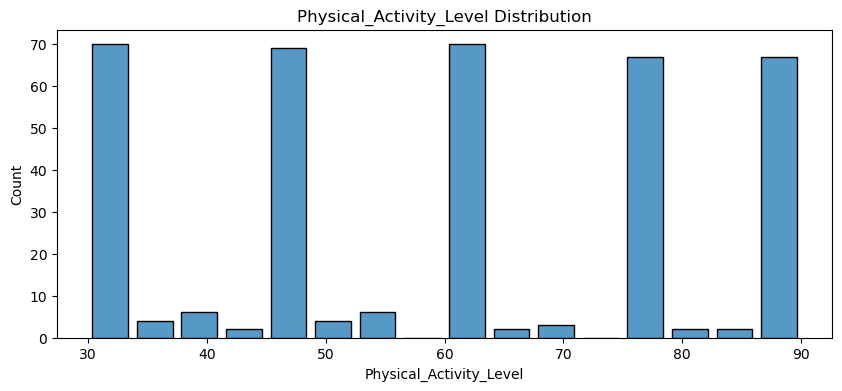

In [38]:
plot_hist(data["Physical_Activity_Level"],bins=16,shrink=0.8,fig_size=(10,4))

<Axes: xlabel='Physical_Activity_Level', ylabel='count'>

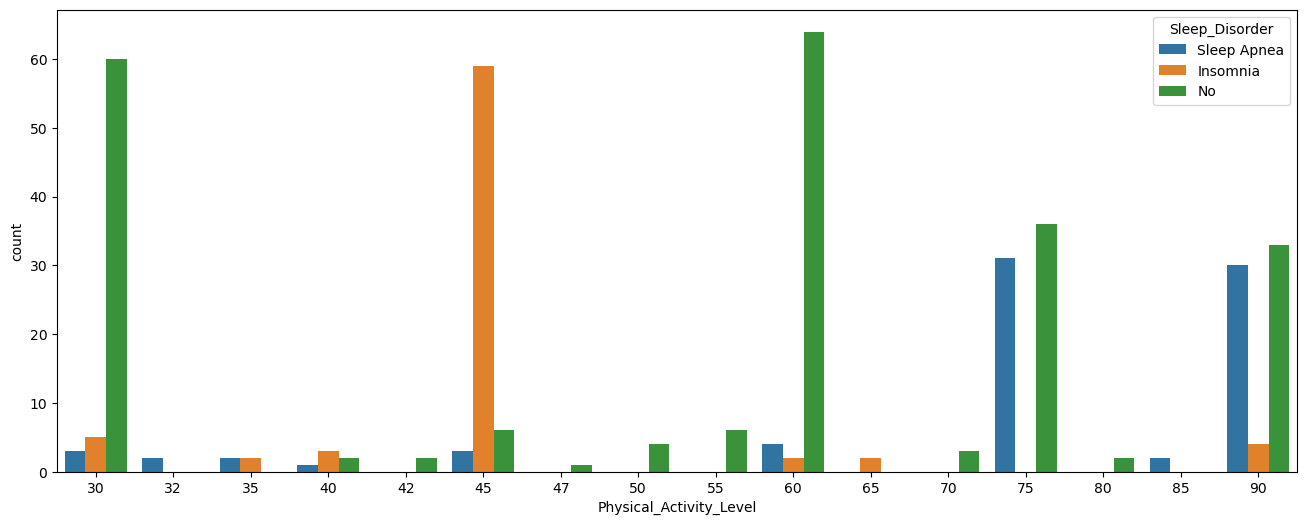

In [39]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Physical_Activity_Level", hue="Sleep_Disorder")

### Stress_Level

In [40]:
print("len:", len(data.groupby('Stress_Level')['Stress_Level'].count()))
data.groupby('Stress_Level')['Stress_Level'].count()

len: 6


Stress_Level
3    71
4    70
5    67
6    46
7    50
8    70
Name: Stress_Level, dtype: int64

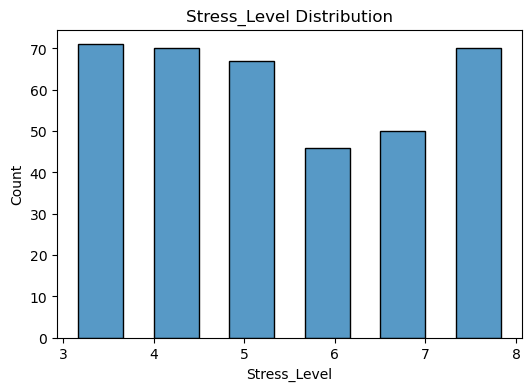

In [41]:
plot_hist(data["Stress_Level"],bins=6,shrink=0.6,fig_size=(6,4))

<Axes: xlabel='Stress_Level', ylabel='count'>

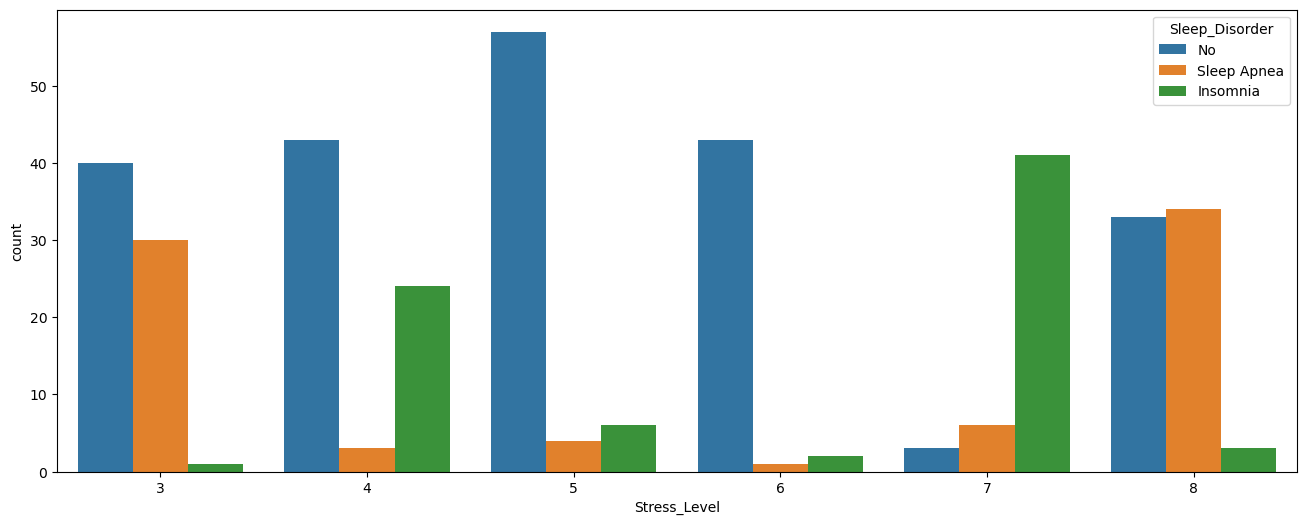

In [42]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Stress_Level", hue="Sleep_Disorder")

### BMI_Category

In [43]:
print("len:", len(data.groupby('BMI_Category')['BMI_Category'].count()))
data.groupby('BMI_Category')['BMI_Category'].count()

len: 4


BMI_Category
Normal           195
Normal Weight     21
Obese             10
Overweight       148
Name: BMI_Category, dtype: int64

fix

In [44]:
bmi_class = {
        "underweight": "Normal",
        "normal weight": "Normal Weight",
        "overweight": "Overweight",
        "obesity": "Obese"
    }

In [45]:
bmi_class.items()

dict_items([('underweight', 'Normal'), ('normal weight', 'Normal Weight'), ('overweight', 'Overweight'), ('obesity', 'Obese')])

In [46]:
def bmifix(text,d=bmi_class):
    for k, v in d.items():
        if v == text:
            return k
    return None


In [47]:
data['BMI_Category']=data['BMI_Category'].apply(bmifix)

In [48]:
data

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,1,27,2,6.1,6,42,6,overweight,126/83,77,4200,No
1,2,1,28,3,6.2,6,60,8,underweight,125/80,75,10000,No
2,3,1,28,3,6.2,6,60,8,underweight,125/80,75,10000,No
3,4,1,28,5,5.9,4,30,8,obesity,140/90,85,3000,Sleep Apnea
4,5,1,28,5,5.9,4,30,8,obesity,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,3,8.1,9,75,3,overweight,140/95,68,7000,Sleep Apnea
370,371,0,59,3,8.0,9,75,3,overweight,140/95,68,7000,Sleep Apnea
371,372,0,59,3,8.1,9,75,3,overweight,140/95,68,7000,Sleep Apnea
372,373,0,59,3,8.1,9,75,3,overweight,140/95,68,7000,Sleep Apnea


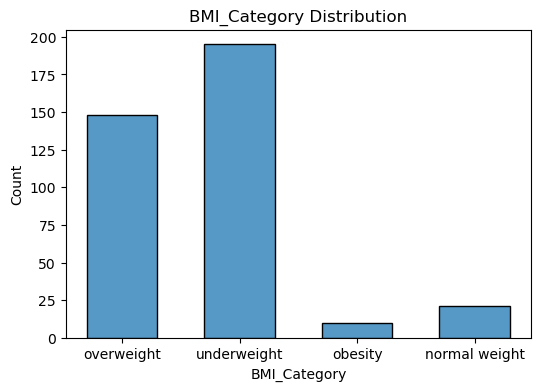

In [49]:
plot_hist(data["BMI_Category"],bins=4,shrink=0.6,fig_size=(6,4))

<Axes: xlabel='BMI_Category', ylabel='count'>

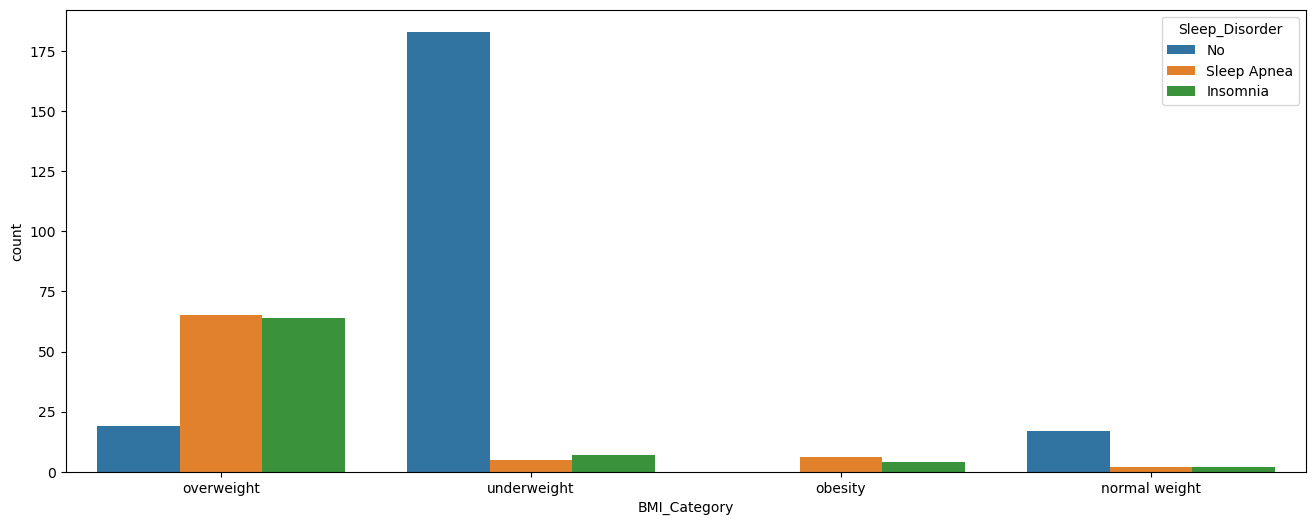

In [50]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="BMI_Category", hue="Sleep_Disorder")

In [51]:
data["BMI_Category"]=lab.fit_transform(data["BMI_Category"])

In [52]:
bmi_dict = dict(zip(lab.classes_, lab.transform(lab.classes_)))
bmi_dict

{'normal weight': np.int64(0),
 'obesity': np.int64(1),
 'overweight': np.int64(2),
 'underweight': np.int64(3)}

In [53]:
data

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,1,27,2,6.1,6,42,6,2,126/83,77,4200,No
1,2,1,28,3,6.2,6,60,8,3,125/80,75,10000,No
2,3,1,28,3,6.2,6,60,8,3,125/80,75,10000,No
3,4,1,28,5,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea
4,5,1,28,5,5.9,4,30,8,1,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,3,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea
370,371,0,59,3,8.0,9,75,3,2,140/95,68,7000,Sleep Apnea
371,372,0,59,3,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea
372,373,0,59,3,8.1,9,75,3,2,140/95,68,7000,Sleep Apnea


### Blood_Pressure

In [54]:
print("len:", len(data.groupby('Blood_Pressure')['Blood_Pressure'].count()))
data.groupby('Blood_Pressure')['Blood_Pressure'].count()

len: 25


Blood_Pressure
115/75    32
115/78     2
117/76     2
118/75     2
118/76     1
119/77     2
120/80    45
121/79     1
122/80     1
125/80    65
125/82     4
126/83     2
128/84     2
128/85     3
129/84     2
130/85    99
130/86     2
131/86     2
132/87     3
135/88     2
135/90    27
139/91     2
140/90     4
140/95    65
142/92     2
Name: Blood_Pressure, dtype: int64

fix

In [55]:
def blpr_fix(x):
    x=x.split('/')
    x=(float(x[0])+float(x[1]))/2
    return x

In [56]:
data['Blood_Pressure']=data['Blood_Pressure'].apply(blpr_fix)

In [57]:
data.groupby('Blood_Pressure')['Blood_Pressure'].count()

Blood_Pressure
95.0     32
96.5      6
97.0      1
98.0      2
100.0    46
101.0     1
102.5    65
103.5     4
104.5     2
106.0     2
106.5     5
107.5    99
108.0     2
108.5     2
109.5     3
111.5     2
112.5    27
115.0     6
117.0     2
117.5    65
Name: Blood_Pressure, dtype: int64

In [58]:
data

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,1,27,2,6.1,6,42,6,2,104.5,77,4200,No
1,2,1,28,3,6.2,6,60,8,3,102.5,75,10000,No
2,3,1,28,3,6.2,6,60,8,3,102.5,75,10000,No
3,4,1,28,5,5.9,4,30,8,1,115.0,85,3000,Sleep Apnea
4,5,1,28,5,5.9,4,30,8,1,115.0,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,3,8.1,9,75,3,2,117.5,68,7000,Sleep Apnea
370,371,0,59,3,8.0,9,75,3,2,117.5,68,7000,Sleep Apnea
371,372,0,59,3,8.1,9,75,3,2,117.5,68,7000,Sleep Apnea
372,373,0,59,3,8.1,9,75,3,2,117.5,68,7000,Sleep Apnea


<Axes: xlabel='Blood_Pressure', ylabel='count'>

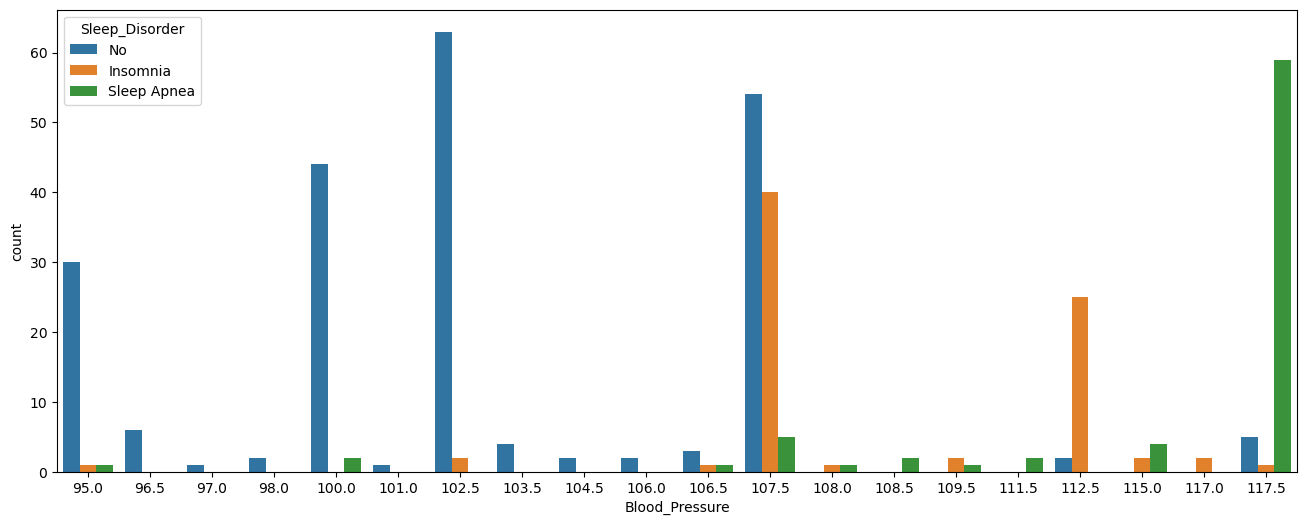

In [59]:
plt.figure(figsize=(16,6))
sns.countplot(data=data, x="Blood_Pressure", hue="Sleep_Disorder")

### Heart_Rate

In [60]:
print("len:", len(data.groupby('Heart_Rate')['Heart_Rate'].count()))
data.groupby('Heart_Rate')['Heart_Rate'].count()

len: 19


Heart_Rate
65    67
67     2
68    94
69     2
70    76
72    69
73     2
74     2
75    36
76     2
77     2
78     5
80     3
81     2
82     1
83     2
84     2
85     3
86     2
Name: Heart_Rate, dtype: int64

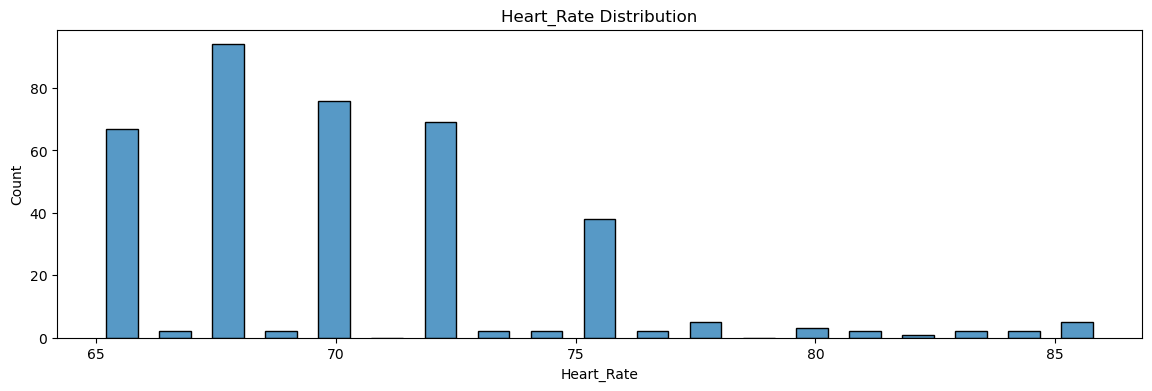

In [61]:
plot_hist(data["Heart_Rate"],bins=19,shrink=0.6,fig_size=(14,4))

### Daily_Steps

In [62]:
print("len:", len(data.groupby('Daily_Steps')['Daily_Steps'].count()))
data.groupby('Daily_Steps')['Daily_Steps'].count()

len: 20


Daily_Steps
3000       3
3300       2
3500       3
3700       2
4000       3
4100       2
4200       2
4800       2
5000      68
5200       2
5500       4
5600       2
6000      68
6200       1
6800       3
7000      66
7300       2
7500       2
8000     101
10000     36
Name: Daily_Steps, dtype: int64

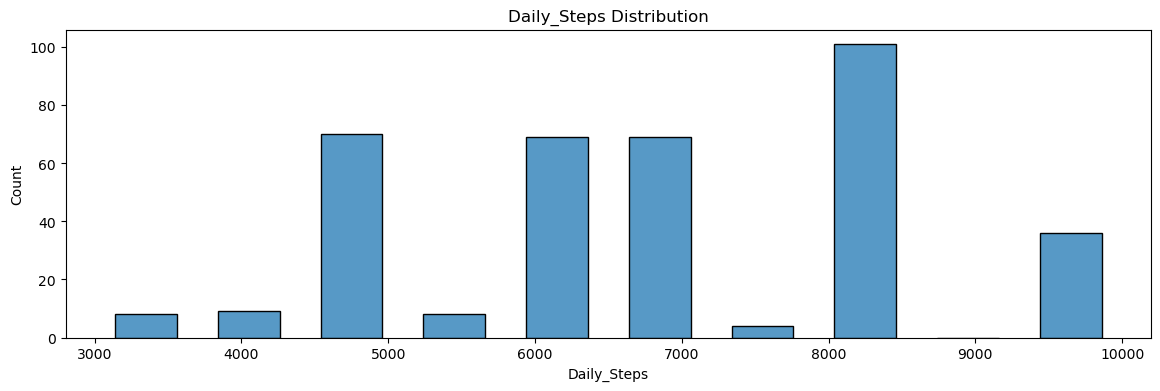

In [63]:
plot_hist(data["Daily_Steps"],bins=10,shrink=0.6,fig_size=(14,4))

### Sleep_Disorder

In [64]:
print("len:", len(data.groupby('Sleep_Disorder')['Sleep_Disorder'].count()))
data.groupby('Sleep_Disorder')['Sleep_Disorder'].count()

len: 3


Sleep_Disorder
Insomnia        77
No             219
Sleep Apnea     78
Name: Sleep_Disorder, dtype: int64

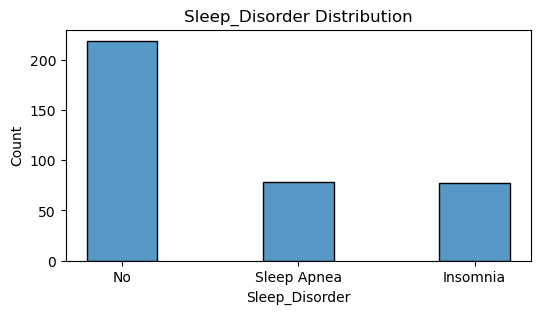

In [65]:
plot_hist(data["Sleep_Disorder"],bins=10,shrink=0.4,fig_size=(6,3))

In [66]:
data['Sleep_Disorder']=lab.fit_transform(data['Sleep_Disorder'])

In [67]:
sldi_dict = dict(zip(lab.classes_, lab.transform(lab.classes_)))
sldi_dict

{'Insomnia': np.int64(0), 'No': np.int64(1), 'Sleep Apnea': np.int64(2)}

In [68]:
data.groupby('Sleep_Disorder')['Sleep_Disorder'].count()

Sleep_Disorder
0     77
1    219
2     78
Name: Sleep_Disorder, dtype: int64

### trainable data

In [69]:
data=data.drop(['Person_ID'],axis=1)

In [70]:
data

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,27,2,6.1,6,42,6,2,104.5,77,4200,1
1,1,28,3,6.2,6,60,8,3,102.5,75,10000,1
2,1,28,3,6.2,6,60,8,3,102.5,75,10000,1
3,1,28,5,5.9,4,30,8,1,115.0,85,3000,2
4,1,28,5,5.9,4,30,8,1,115.0,85,3000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,3,8.1,9,75,3,2,117.5,68,7000,2
370,0,59,3,8.0,9,75,3,2,117.5,68,7000,2
371,0,59,3,8.1,9,75,3,2,117.5,68,7000,2
372,0,59,3,8.1,9,75,3,2,117.5,68,7000,2


In [71]:
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [72]:
scale=StandardScaler()

In [73]:
data['Age']=scale.fit_transform(data[['Age']])
data['Sleep_Duration']=scale.fit_transform(data[['Sleep_Duration']])
data['Physical_Activity_Level']=scale.fit_transform(data[['Physical_Activity_Level']])
data['Blood_Pressure']=scale.fit_transform(data[['Blood_Pressure']])
data['Heart_Rate']=scale.fit_transform(data[['Heart_Rate']])
data['Daily_Steps']=scale.fit_transform(data[['Sleep_Duration']])

<Axes: >

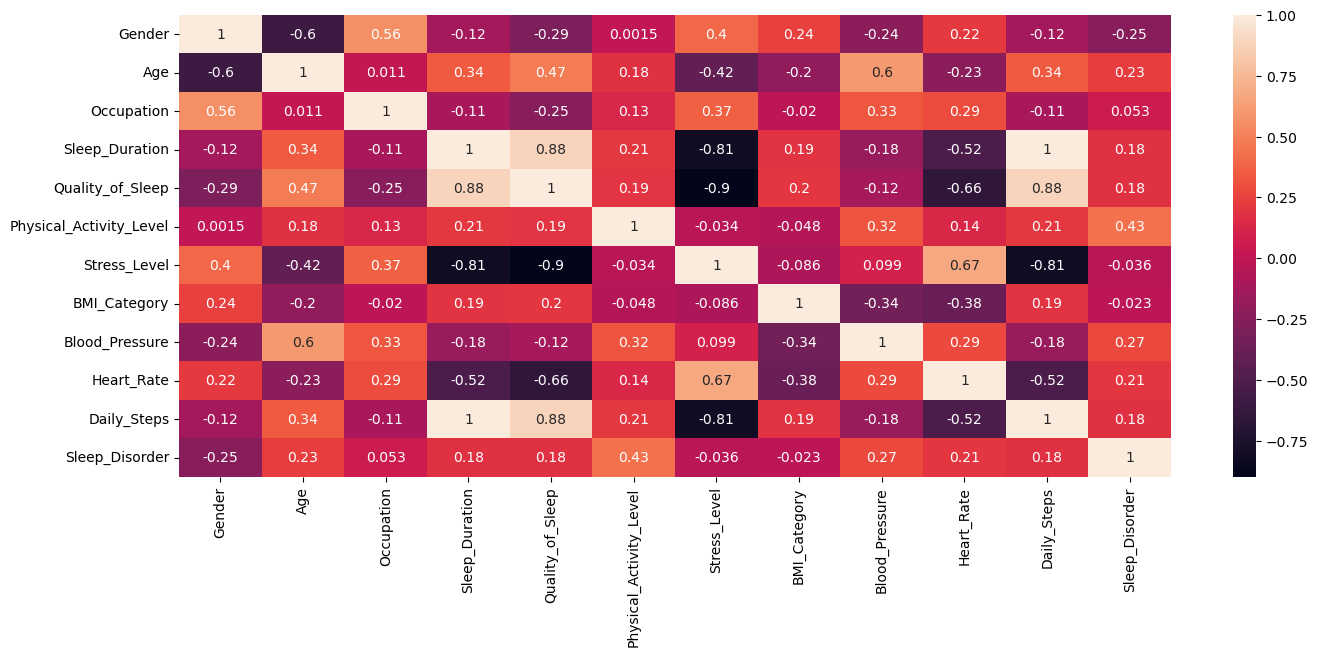

In [74]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)

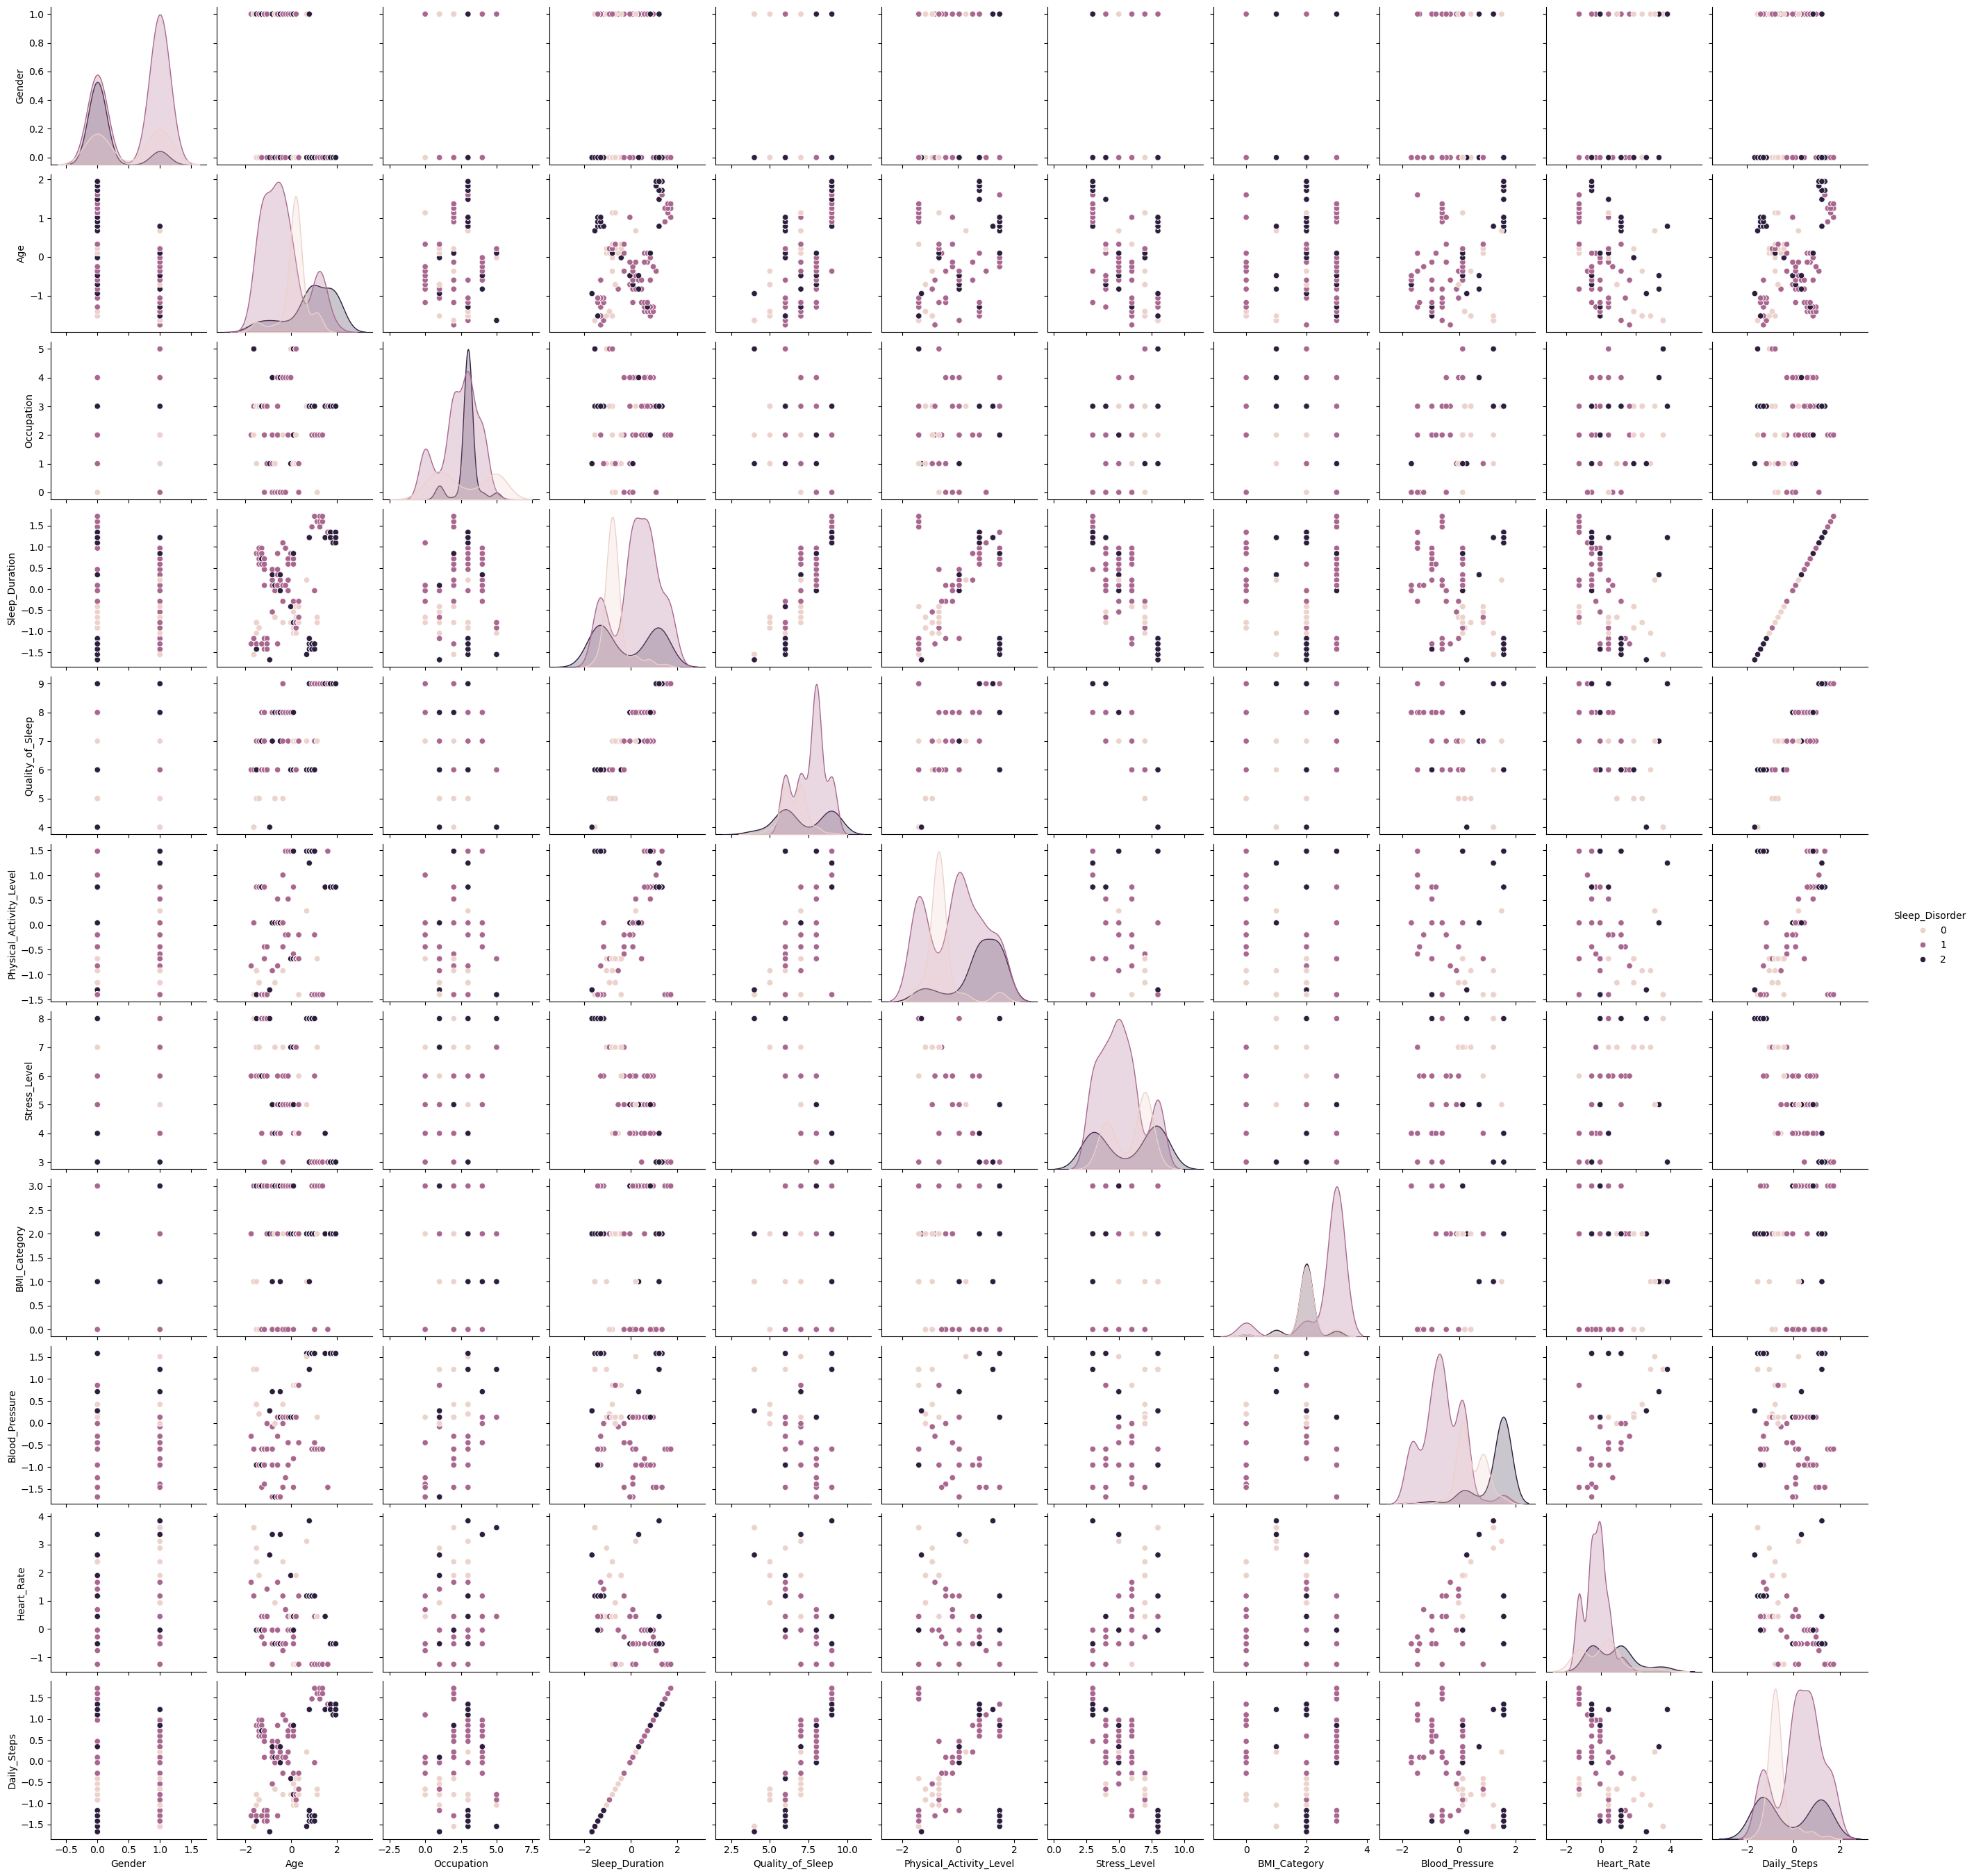

In [75]:
sns.pairplot(data,hue='Sleep_Disorder')

<Figure size 600x400 with 0 Axes>

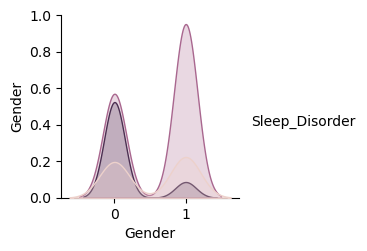

<Figure size 600x400 with 0 Axes>

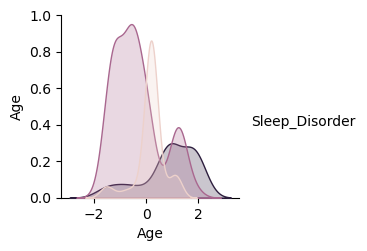

<Figure size 600x400 with 0 Axes>

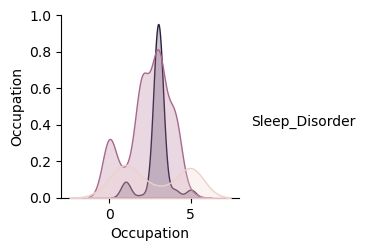

<Figure size 600x400 with 0 Axes>

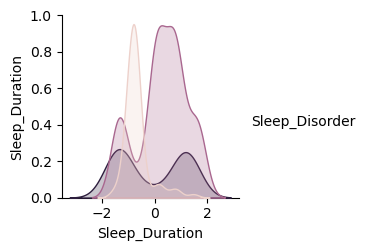

<Figure size 600x400 with 0 Axes>

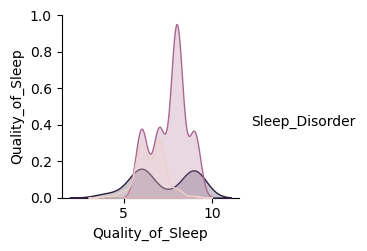

<Figure size 600x400 with 0 Axes>

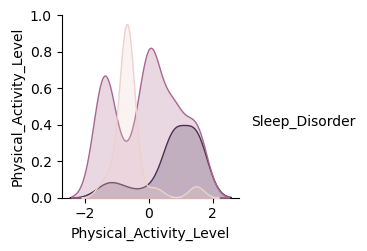

<Figure size 600x400 with 0 Axes>

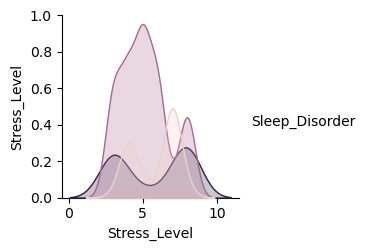

<Figure size 600x400 with 0 Axes>

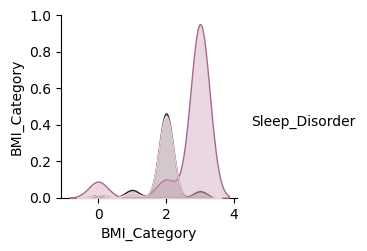

<Figure size 600x400 with 0 Axes>

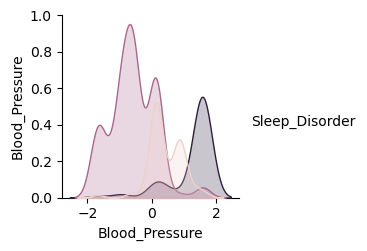

<Figure size 600x400 with 0 Axes>

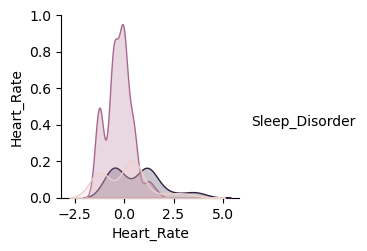

<Figure size 600x400 with 0 Axes>

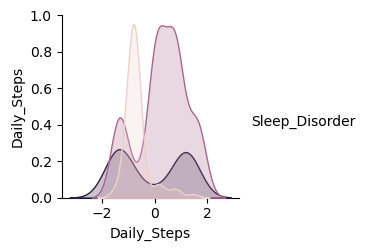

In [76]:
features = data.drop(['Sleep_Disorder'], axis=1).columns

for feature in features:
    plt.figure(figsize=(6,4))
    sns.pairplot(data[['Sleep_Disorder', feature]], hue='Sleep_Disorder')
    plt.show()

## bulding tredtional model

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [78]:
data

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,-1.753096,2,-1.298887,6,-0.825418,6,2,-0.304627,1.654719,-1.298887,1
1,1,-1.637643,3,-1.173036,6,0.039844,8,3,-0.594527,1.170474,-1.173036,1
2,1,-1.637643,3,-1.173036,6,0.039844,8,3,-0.594527,1.170474,-1.173036,1
3,1,-1.637643,5,-1.550588,4,-1.402260,8,1,1.217347,3.591698,-1.550588,2
4,1,-1.637643,5,-1.550588,4,-1.402260,8,1,1.217347,3.591698,-1.550588,2
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127,2
370,0,1.941401,3,1.092276,9,0.760896,3,2,1.579722,-0.524383,1.092276,2
371,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127,2
372,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127,2


In [79]:
features=data.drop(['Sleep_Disorder'],axis=1)
features

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps
0,1,-1.753096,2,-1.298887,6,-0.825418,6,2,-0.304627,1.654719,-1.298887
1,1,-1.637643,3,-1.173036,6,0.039844,8,3,-0.594527,1.170474,-1.173036
2,1,-1.637643,3,-1.173036,6,0.039844,8,3,-0.594527,1.170474,-1.173036
3,1,-1.637643,5,-1.550588,4,-1.402260,8,1,1.217347,3.591698,-1.550588
4,1,-1.637643,5,-1.550588,4,-1.402260,8,1,1.217347,3.591698,-1.550588
...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127
370,0,1.941401,3,1.092276,9,0.760896,3,2,1.579722,-0.524383,1.092276
371,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127
372,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127


In [80]:
features.describe()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps
count,374.000000,3.740000e+02,374.000000,3.740000e+02,374.000000,3.740000e+02,374.000000,374.000000,3.740000e+02,3.740000e+02,3.740000e+02
mean,0.505348,-4.559633e-16,2.588235,1.348891e-15,7.312834,-3.324732e-17,5.385027,2.382353,-9.499234e-16,-1.377389e-15,3.799694e-17
std,0.500641,1.001340e+00,1.374400,1.001340e+00,1.196956,1.001340e+00,1.774526,0.792599,1.001340e+00,1.001340e+00,1.001340e+00
min,0.000000,-1.753096e+00,0.000000,-1.676439e+00,4.000000,-1.402260e+00,3.000000,0.000000,-1.681652e+00,-1.250750e+00,-1.676439e+00
25%,0.000000,-8.006081e-01,2.000000,-9.213348e-01,6.000000,-6.812078e-01,4.000000,2.000000,-5.945272e-01,-5.243827e-01,-9.213348e-01
50%,1.000000,9.415288e-02,3.000000,8.547080e-02,7.000000,3.984423e-02,5.000000,3.000000,1.302224e-01,-4.013793e-02,8.547080e-02
75%,1.000000,9.023241e-01,3.000000,8.405750e-01,8.000000,7.608963e-01,7.000000,3.000000,8.549720e-01,4.441068e-01,8.405750e-01
max,1.000000,1.941401e+00,5.000000,1.721530e+00,9.000000,1.481948e+00,8.000000,3.000000,1.579722e+00,3.833820e+00,1.721530e+00


In [81]:
target=pd.DataFrame(data.Sleep_Disorder)
target

,Sleep_Disorder
0,1
1,1
2,1
3,2
4,2
...,...
369,2
370,2
371,2
372,2


In [82]:
target.describe()

,Sleep_Disorder
count,374.000000
mean,1.002674
std,0.644626
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [85]:
import joblib
import warnings

In [86]:
def clasicalmodels(model,xtrain=xtrain,ytrain=ytrain,xtest=xtest,ytest=ytest):
    model.fit(xtrain, ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    print(model,':')
    print("Train Accuracy:", accuracy_score(ytrain, ypred_train))
    print("Test Accuracy :", accuracy_score(ytest, ypred_test))
    print("model score :",model.score(xtest,ytest))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(confusion_matrix(ytrain, ypred_train),annot=True, fmt='d', ax=axes[0], cmap="Blues", cbar=False)
    axes[0].set_title("Train Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    sns.heatmap(confusion_matrix(ytest, ypred_test),annot=True, fmt='d', ax=axes[1], cmap="Blues", cbar=False)
    axes[1].set_title("Test Confusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    plt.show()
        
    from pathlib import Path
    root=Path("models")
    root.mkdir(exist_ok=True)
    path = root / f"{str(model.__class__.__name__)}.pkl"
    joblib.dump(model, path)

    return model
        

In [87]:
#model.__class__.__name__

DecisionTreeClassifier(random_state=33) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


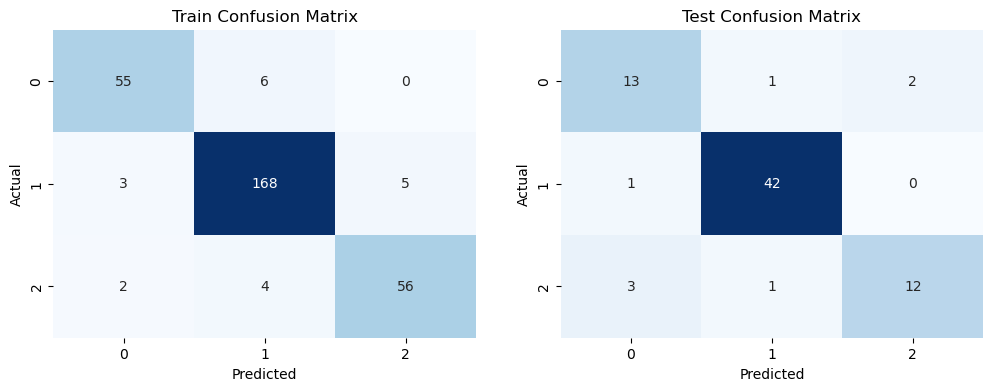

In [88]:
# DecisionTreeClassifier
decitree=clasicalmodels(DecisionTreeClassifier(random_state=33))

RandomForestClassifier(n_estimators=18, random_state=86) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.88
model score : 0.88


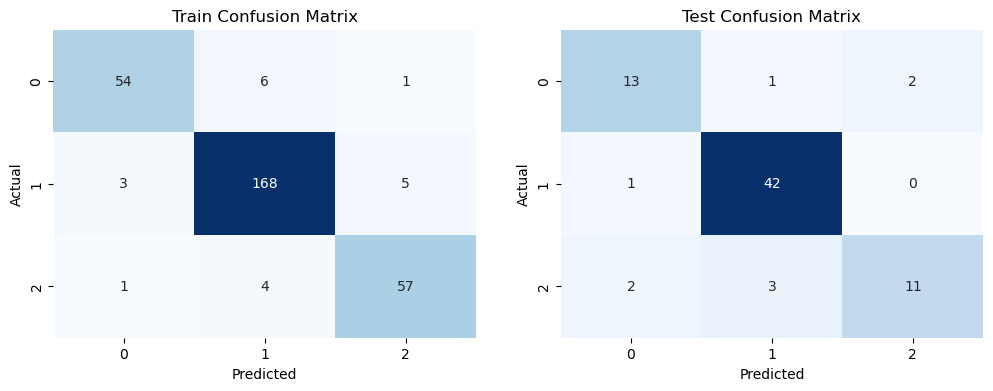

In [89]:
# RandomForestClassifier
warnings.filterwarnings('ignore')
ranfor=clasicalmodels(RandomForestClassifier(n_estimators=18,random_state=86))

LogisticRegression(max_iter=5000, random_state=86) :
Train Accuracy: 0.9163879598662207
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


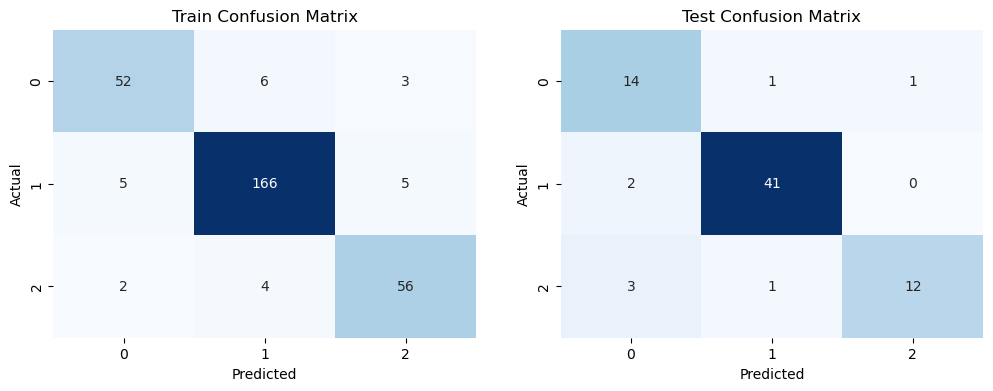

In [90]:
# LogisticRegression
warnings.filterwarnings('ignore')
logcls=clasicalmodels(LogisticRegression(max_iter=5000,random_state=86))

KNeighborsClassifier() :
Train Accuracy: 0.9063545150501672
Test Accuracy : 0.8533333333333334
model score : 0.8533333333333334


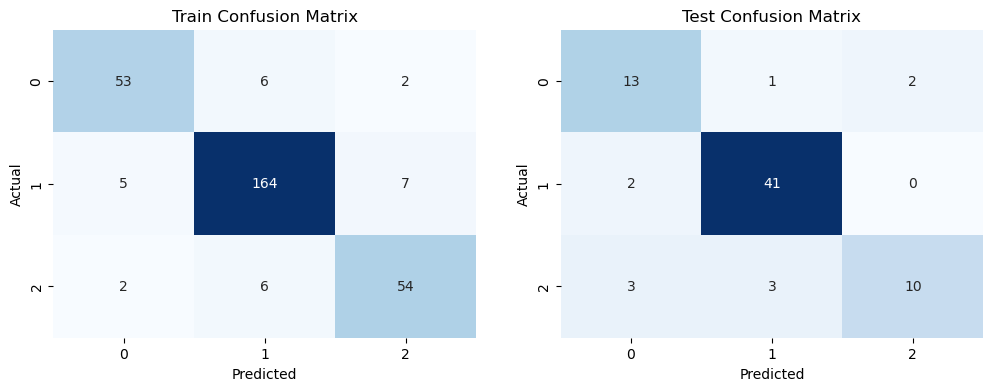

In [91]:
# KNeighborsClassifier
warnings.filterwarnings('ignore')
knc=clasicalmodels(KNeighborsClassifier(n_neighbors=5))

SVC(C=1000, gamma=0.01, random_state=2) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


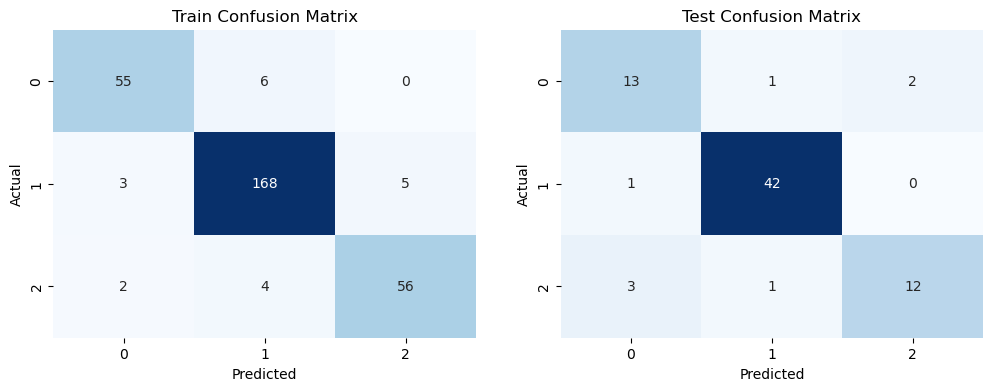

In [92]:
# SVC
warnings.filterwarnings('ignore')
svc=clasicalmodels(SVC(C = 1000 ,random_state=2, gamma = 0.01))

GaussianNB() :
Train Accuracy: 0.8896321070234113
Test Accuracy : 0.8533333333333334
model score : 0.8533333333333334


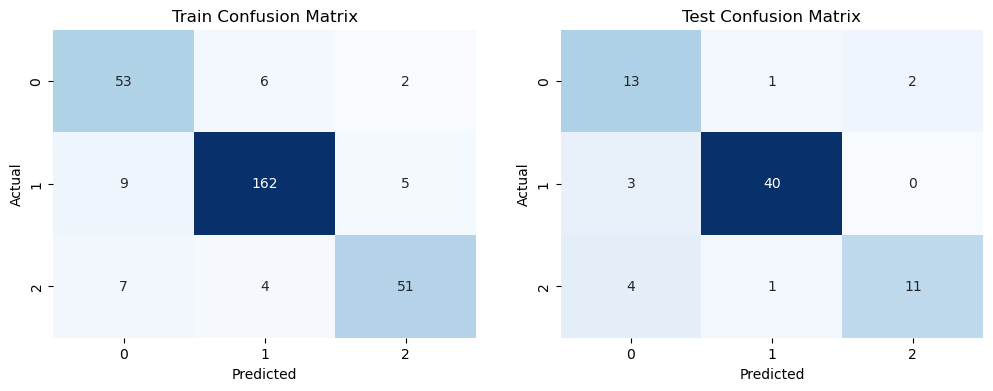

In [93]:
# GaussianNB
warnings.filterwarnings('ignore')
gauss=clasicalmodels(GaussianNB())

In [94]:
# BaggingClassifier

In [95]:
def clasicalmodels(model,pathname,xtrain=xtrain,ytrain=ytrain,xtest=xtest,ytest=ytest):
    model.fit(xtrain, ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    print(model,':')
    print("Train Accuracy:", accuracy_score(ytrain, ypred_train))
    print("Test Accuracy :", accuracy_score(ytest, ypred_test))
    print("model score :",model.score(xtest,ytest))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(confusion_matrix(ytrain, ypred_train),annot=True, fmt='d', ax=axes[0], cmap="Blues", cbar=False)
    axes[0].set_title("Train Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    sns.heatmap(confusion_matrix(ytest, ypred_test),annot=True, fmt='d', ax=axes[1], cmap="Blues", cbar=False)
    axes[1].set_title("Test Confusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    plt.show()
        
    from pathlib import Path
    root=Path("models")
    root.mkdir(exist_ok=True)
    path = root / f"{str(pathname)}.pkl"
    joblib.dump(model, path)

    return model
        

BaggingClassifier(estimator=LogisticRegression(max_iter=5000, random_state=86),
                  n_estimators=15) :
Train Accuracy: 0.919732441471572
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


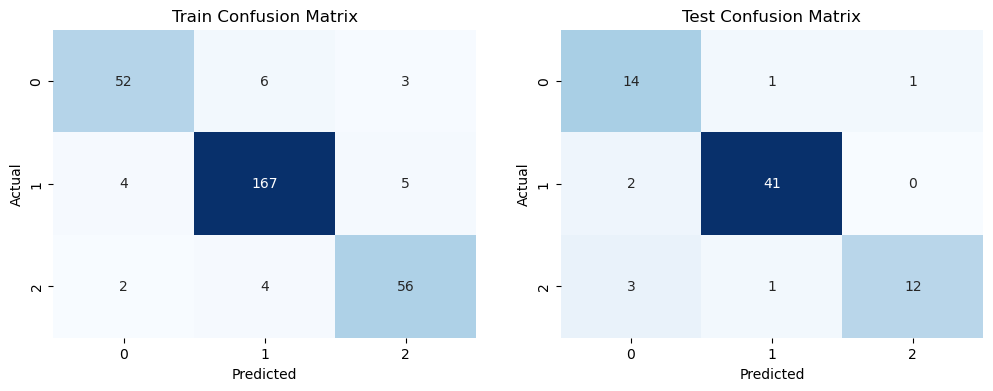

In [96]:
# BaggingClassifier with LogisticRegression
warnings.filterwarnings('ignore')
bag_logr=clasicalmodels(BaggingClassifier(n_estimators=15,estimator=logcls),'BaggingClassifier_LogisticRegression')

BaggingClassifier(estimator=SVC(C=1000, gamma=0.01, random_state=2),
                  n_estimators=15) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


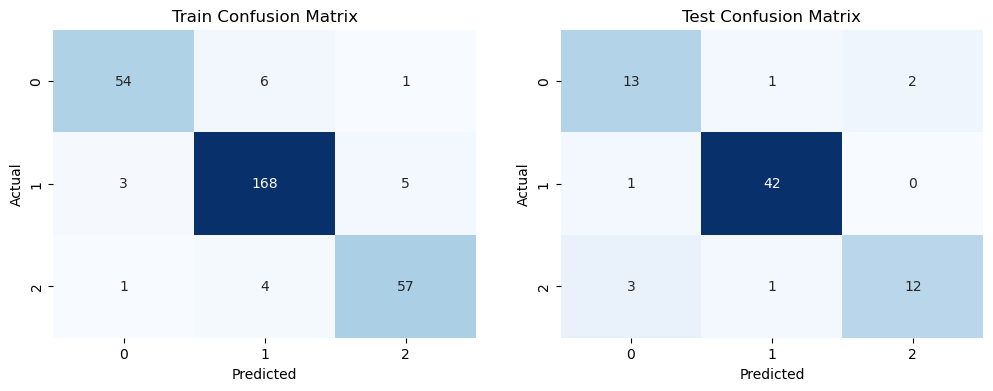

In [97]:
# BaggingClassifier with SVC
warnings.filterwarnings('ignore')
bag_svc=clasicalmodels(BaggingClassifier(n_estimators=15,estimator=svc),'BaggingClassifier_SVC')

BaggingClassifier(estimator=SVC(C=1000, gamma=0.01, random_state=2),
                  n_estimators=15) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


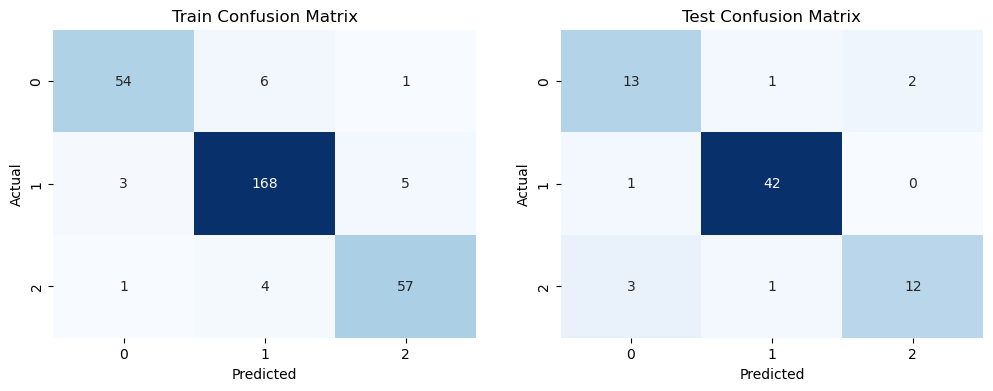

In [98]:
# BaggingClassifier with KNeighborsClassifier
warnings.filterwarnings('ignore')
bag_knn=clasicalmodels(BaggingClassifier(n_estimators=15,estimator=svc),'BaggingClassifier_KNeighborsClassifier')

BaggingClassifier(estimator=SVC(C=1000, gamma=0.01, random_state=2),
                  n_estimators=15) :
Train Accuracy: 0.9331103678929766
Test Accuracy : 0.8933333333333333
model score : 0.8933333333333333


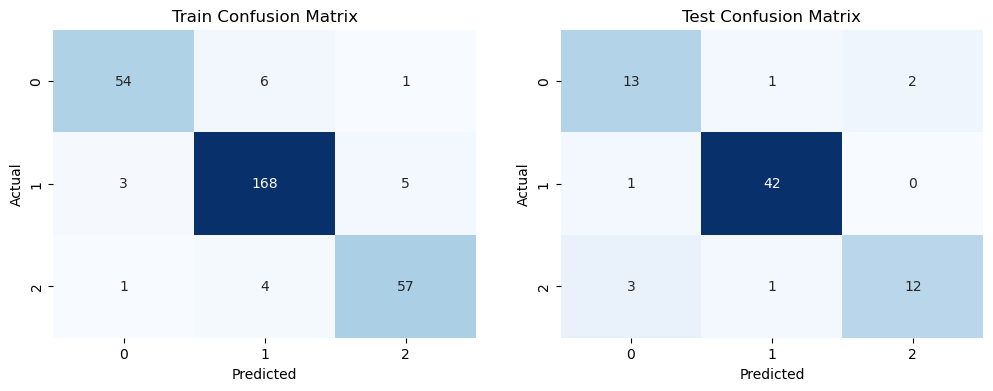

In [99]:
# BaggingClassifier with GaussianNB
warnings.filterwarnings('ignore')
bag_gauss=clasicalmodels(BaggingClassifier(n_estimators=15,estimator=svc),'BaggingClassifier_GaussianNB')

In [ ]:
## BaggingClassifier_LogisticRegression with higest score of ~0.9 in clasical machine learning

### simple FFN

In [101]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [102]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [248]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values.squeeze(), dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [104]:
train_dataset = CustomDataset(features,target)

In [114]:
train_dataloader = DataLoader(train_dataset, batch_size=30, shuffle=True)

In [115]:
for i in range(30):
    print(next(iter(train_dataloader)))

[tensor([[ 0.0000,  1.2487,  2.0000,  1.5957,  9.0000, -1.4023,  3.0000,  3.0000,
         -0.5945, -1.2507,  1.5957],
        [ 1.0000,  0.0942,  5.0000, -0.7955,  6.0000, -0.6812,  7.0000,  2.0000,
          0.1302,  0.4441, -0.7955],
        [ 0.0000, -1.0604,  1.0000, -1.1730,  6.0000, -0.4409,  6.0000,  2.0000,
         -0.0147,  1.4126, -1.1730],
        [ 1.0000, -1.6376,  2.0000, -1.5506,  4.0000, -1.4023,  8.0000,  1.0000,
          1.2173,  3.5917, -1.5506],
        [ 1.0000,  0.0942,  5.0000, -0.7955,  6.0000, -0.6812,  7.0000,  2.0000,
          0.1302,  0.4441, -0.7955],
        [ 1.0000, -1.7531,  2.0000, -1.2989,  6.0000, -0.8254,  6.0000,  2.0000,
         -0.3046,  1.6547, -1.2989],
        [ 1.0000, -0.8295,  2.0000,  0.2113,  8.0000,  0.0398,  4.0000,  3.0000,
         -0.5945, -1.2507,  0.2113],
        [ 1.0000, -0.3677,  4.0000,  0.0855,  8.0000,  0.0398,  5.0000,  3.0000,
          0.1302, -0.5244,  0.0855],
        [ 0.0000, -0.3677,  4.0000, -0.2921,  7.0000, -

In [218]:
class simple_ffn(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_features, 22),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(22, 44),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(44, 88),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(88, 44),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(44, 22),
            nn.ReLU(),
            nn.Dropout(0.),

            nn.Linear(22, output_features)
        )

    def forward(self, x):
        return self.net(x)


In [181]:
class simple_ffn(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_features, 22),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(22, 44),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(44, 44),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(44, 22),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(22, 11),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(11, 6),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(6, output_features)
        )

    def forward(self, x):
        return self.net(x)


In [219]:
simple_model=simple_ffn(11,3).to(device)
simple_model

simple_ffn(
  (net): Sequential(
    (0): Linear(in_features=11, out_features=22, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=22, out_features=44, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=44, out_features=88, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=88, out_features=44, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=44, out_features=22, bias=True)
    (13): ReLU()
    (14): Dropout(p=0.0, inplace=False)
    (15): Linear(in_features=22, out_features=3, bias=True)
  )
)

In [220]:
#loss functioon 
loss_fn=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.Adam(params=simple_model.parameters(),lr=0.00001)

In [221]:
def accuracy_fn(y_true, y_pred):
    return (y_true == y_pred).sum().item() / len(y_true)


In [222]:
def train(model, epochs, train_dataloader=train_dataloader,device=device):
    torch.cuda.manual_seed_all(33)
    for epoch in range(epochs):
        model.train()
        avg_loss = 0.0
        avg_acc  = 0.0

        for step, (x, y) in enumerate(train_dataloader):

            x = x.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            logits = model(x)
            loss = loss_fn(logits, y)

            loss.backward()
            optimizer.step()

            preds = torch.softmax(logits, dim=1).argmax(dim=1)
            acc = accuracy_fn(y, preds)

            avg_loss += loss.item()
            avg_acc  += acc
            #if step % 30==0:
             #   print(f"Epoch {epoch} | Batch {step+1}/{len(train_dataloader)} | Loss {loss.item():.4f} | Acc {acc:.4f}")

        avg_loss /= (step + 1)
        avg_acc  /= (step + 1)

        print(f"Epoch {epoch} summary | Avg Loss {avg_loss:.4f} | Avg Acc {avg_acc:.4f}")


In [223]:
train(simple_model, 5500)

Epoch 0 summary | Avg Loss 1.1501 | Avg Acc 0.2117
Epoch 1 summary | Avg Loss 1.1528 | Avg Acc 0.2040
Epoch 2 summary | Avg Loss 1.1490 | Avg Acc 0.2114
Epoch 3 summary | Avg Loss 1.1537 | Avg Acc 0.1978
Epoch 4 summary | Avg Loss 1.1477 | Avg Acc 0.2190
Epoch 5 summary | Avg Loss 1.1438 | Avg Acc 0.2070
Epoch 6 summary | Avg Loss 1.1466 | Avg Acc 0.1956
Epoch 7 summary | Avg Loss 1.1504 | Avg Acc 0.1985
Epoch 8 summary | Avg Loss 1.1465 | Avg Acc 0.2059
Epoch 9 summary | Avg Loss 1.1440 | Avg Acc 0.2088
Epoch 10 summary | Avg Loss 1.1471 | Avg Acc 0.2136
Epoch 11 summary | Avg Loss 1.1451 | Avg Acc 0.1930
Epoch 12 summary | Avg Loss 1.1370 | Avg Acc 0.1941
Epoch 13 summary | Avg Loss 1.1450 | Avg Acc 0.2443
Epoch 14 summary | Avg Loss 1.1339 | Avg Acc 0.2535
Epoch 15 summary | Avg Loss 1.1410 | Avg Acc 0.2352
Epoch 16 summary | Avg Loss 1.1307 | Avg Acc 0.2223
Epoch 17 summary | Avg Loss 1.1371 | Avg Acc 0.2172
Epoch 18 summary | Avg Loss 1.1319 | Avg Acc 0.2659
Epoch 19 summary | Avg

In [224]:
train(simple_model, 2500)

Epoch 0 summary | Avg Loss 0.5398 | Avg Acc 0.8267
Epoch 1 summary | Avg Loss 0.5296 | Avg Acc 0.8634
Epoch 2 summary | Avg Loss 0.5251 | Avg Acc 0.8564
Epoch 3 summary | Avg Loss 0.5619 | Avg Acc 0.8630
Epoch 4 summary | Avg Loss 0.5401 | Avg Acc 0.8659
Epoch 5 summary | Avg Loss 0.4966 | Avg Acc 0.8663
Epoch 6 summary | Avg Loss 0.5794 | Avg Acc 0.8377
Epoch 7 summary | Avg Loss 0.5677 | Avg Acc 0.8425
Epoch 8 summary | Avg Loss 0.5152 | Avg Acc 0.8505
Epoch 9 summary | Avg Loss 0.5005 | Avg Acc 0.8564
Epoch 10 summary | Avg Loss 0.5861 | Avg Acc 0.8300
Epoch 11 summary | Avg Loss 0.5362 | Avg Acc 0.8766
Epoch 12 summary | Avg Loss 0.5076 | Avg Acc 0.8692
Epoch 13 summary | Avg Loss 0.5571 | Avg Acc 0.8604
Epoch 14 summary | Avg Loss 0.5661 | Avg Acc 0.8553
Epoch 15 summary | Avg Loss 0.5630 | Avg Acc 0.8480
Epoch 16 summary | Avg Loss 0.5086 | Avg Acc 0.8637
Epoch 17 summary | Avg Loss 0.5355 | Avg Acc 0.8454
Epoch 18 summary | Avg Loss 0.5058 | Avg Acc 0.8527
Epoch 19 summary | Avg

In [225]:
train(simple_model, 2500)

Epoch 0 summary | Avg Loss 0.5226 | Avg Acc 0.8835
Epoch 1 summary | Avg Loss 0.4884 | Avg Acc 0.8890
Epoch 2 summary | Avg Loss 0.4799 | Avg Acc 0.8740
Epoch 3 summary | Avg Loss 0.4650 | Avg Acc 0.8949
Epoch 4 summary | Avg Loss 0.4695 | Avg Acc 0.8736
Epoch 5 summary | Avg Loss 0.4811 | Avg Acc 0.8579
Epoch 6 summary | Avg Loss 0.5151 | Avg Acc 0.8659
Epoch 7 summary | Avg Loss 0.4967 | Avg Acc 0.8791
Epoch 8 summary | Avg Loss 0.4625 | Avg Acc 0.8681
Epoch 9 summary | Avg Loss 0.4783 | Avg Acc 0.8971
Epoch 10 summary | Avg Loss 0.4890 | Avg Acc 0.8821
Epoch 11 summary | Avg Loss 0.4596 | Avg Acc 0.8663
Epoch 12 summary | Avg Loss 0.4725 | Avg Acc 0.8740
Epoch 13 summary | Avg Loss 0.4524 | Avg Acc 0.8897
Epoch 14 summary | Avg Loss 0.4690 | Avg Acc 0.8846
Epoch 15 summary | Avg Loss 0.4609 | Avg Acc 0.8766
Epoch 16 summary | Avg Loss 0.4982 | Avg Acc 0.8817
Epoch 17 summary | Avg Loss 0.4652 | Avg Acc 0.8744
Epoch 18 summary | Avg Loss 0.4680 | Avg Acc 0.8839
Epoch 19 summary | Avg

In [233]:
simple_model.eval()
with torch.inference_mode():
    logits = simple_model(torch.tensor(features.values, dtype=torch.float32).to(device))
    preds = logits.argmax(dim=1).cpu().numpy()

In [236]:
print(accuracy_score(target, preds))

0.9010695187165776


<Axes: >

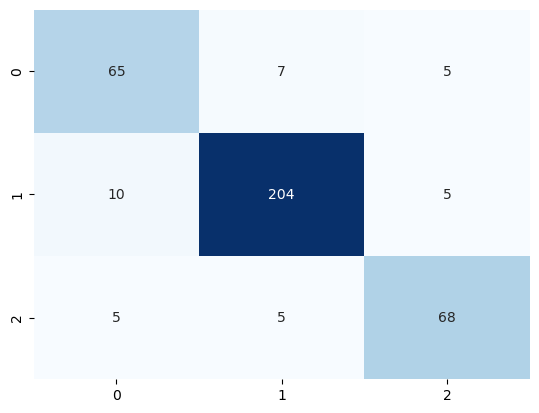

In [235]:
cm = confusion_matrix(target, preds)
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues", cbar=False)

In [237]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)
path= root / "simpleFFN.pth"

In [239]:
torch.save(simple_model,path)

### custom FFN

In [240]:
data

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,-1.753096,2,-1.298887,6,-0.825418,6,2,-0.304627,1.654719,-1.298887,1
1,1,-1.637643,3,-1.173036,6,0.039844,8,3,-0.594527,1.170474,-1.173036,1
2,1,-1.637643,3,-1.173036,6,0.039844,8,3,-0.594527,1.170474,-1.173036,1
3,1,-1.637643,5,-1.550588,4,-1.402260,8,1,1.217347,3.591698,-1.550588,2
4,1,-1.637643,5,-1.550588,4,-1.402260,8,1,1.217347,3.591698,-1.550588,2
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127,2
370,0,1.941401,3,1.092276,9,0.760896,3,2,1.579722,-0.524383,1.092276,2
371,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127,2
372,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127,2


In [243]:
num_data=data.drop(['Gender','Occupation','Quality_of_Sleep','Stress_Level','BMI_Category','Sleep_Disorder'],axis=1)
num_data

,Age,Sleep_Duration,Physical_Activity_Level,Blood_Pressure,Heart_Rate,Daily_Steps
0,-1.753096,-1.298887,-0.825418,-0.304627,1.654719,-1.298887
1,-1.637643,-1.173036,0.039844,-0.594527,1.170474,-1.173036
2,-1.637643,-1.173036,0.039844,-0.594527,1.170474,-1.173036
3,-1.637643,-1.550588,-1.402260,1.217347,3.591698,-1.550588
4,-1.637643,-1.550588,-1.402260,1.217347,3.591698,-1.550588
...,...,...,...,...,...,...
369,1.941401,1.218127,0.760896,1.579722,-0.524383,1.218127
370,1.941401,1.092276,0.760896,1.579722,-0.524383,1.092276
371,1.941401,1.218127,0.760896,1.579722,-0.524383,1.218127
372,1.941401,1.218127,0.760896,1.579722,-0.524383,1.218127


In [244]:
cata_data=data.drop(['Age','Sleep_Duration','Physical_Activity_Level','Blood_Pressure','Heart_Rate','Daily_Steps','Sleep_Disorder'],axis=1)
cata_data

,Gender,Occupation,Quality_of_Sleep,Stress_Level,BMI_Category
0,1,2,6,6,2
1,1,3,6,8,3
2,1,3,6,8,3
3,1,5,4,8,1
4,1,5,4,8,1
...,...,...,...,...,...
369,0,3,9,3,2
370,0,3,9,3,2
371,0,3,9,3,2
372,0,3,9,3,2


In [245]:
target

,Sleep_Disorder
0,1
1,1
2,1
3,2
4,2
...,...
369,2
370,2
371,2
372,2


In [251]:
class CustomDataset2(Dataset):
    def __init__(self, x1,x2, y):
        self.x1 = torch.tensor(x1.values, dtype=torch.float32)
        self.x2 = torch.tensor(x2.values, dtype=torch.float32)
        self.y = torch.tensor(y.values.squeeze(), dtype=torch.long)

    def __len__(self):
        return len(self.x1)

    def __getitem__(self, idx):
        return self.x1[idx], self.x2[idx], self.y[idx]


In [253]:
train_dataset2 = CustomDataset2(num_data,cata_data,target)

In [254]:
train_dataloader2 = DataLoader(train_dataset2, batch_size=30, shuffle=True)

In [256]:
for i in range(30):
    print(next(iter(train_dataloader2)))

[tensor([[-1.0604, -1.2989, -1.4023, -0.5945,  0.4441, -1.2989],
        [ 0.9023, -1.2989,  1.4819,  1.5797,  1.1705, -1.2989],
        [ 1.9414,  1.0923,  0.7609,  1.5797, -0.5244,  1.0923],
        [-0.8295,  0.2113,  0.0398, -0.5945, -1.2507,  0.2113],
        [-0.5986,  0.0855,  0.0398, -1.6817, -0.5244,  0.0855],
        [-0.7140, -0.6696, -1.1619, -0.0147,  0.9284, -0.6696],
        [-1.1758, -1.1730, -1.4023, -0.5945,  0.4441, -1.1730],
        [ 0.0942,  0.8406,  1.4819,  0.1302, -0.0401,  0.8406],
        [-1.0604, -1.2989, -1.4023, -0.5945,  0.4441, -1.2989],
        [ 0.0942, -0.5438, -0.6812,  0.8550, -1.2507, -0.5438],
        [ 0.7869, -1.1730,  1.4819,  1.5797,  1.1705, -1.1730],
        [ 0.0942, -0.7955, -0.6812,  0.1302,  0.4441, -0.7955],
        [-1.2913, -1.2989, -1.4023, -0.5945,  0.4441, -1.2989],
        [ 1.7105,  1.3440,  0.7609,  1.5797, -0.5244,  1.3440],
        [-0.2522,  0.0855, -0.2005, -1.2468,  0.6862,  0.0855],
        [-1.2913,  0.7147,  0.7609, -0.

In [393]:
class custom_ffn(nn.Module):
    def __init__(self, num_in=6, cata_in=5,outfeature=3):
        super().__init__()

        self.for_num = nn.Sequential( nn.Linear(num_in, 18),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),

                                    nn.Linear(18, 36),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),
                        
                                    nn.Linear(36, 18),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),
                        
                                    nn.Linear(18, 18),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),
                        
                                    nn.Linear(18, 12) )
        
        self.for_cata = nn.Sequential( nn.Linear(cata_in, 25),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),

                                    nn.Linear(25, 50),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),
                        
                                    nn.Linear(50, 25),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),
                        
                                    nn.Linear(25, 10) )

        self.out_layer = nn.Sequential( nn.Linear(22, 44),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),
                        
                                    nn.Linear(44, 88),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),

                                    nn.Linear(88, 44),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),
                        
                                    nn.Linear(44, 22),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),

                                    nn.Linear(22, 12),
                                    nn.ReLU(),
                                    nn.Dropout(0.5),
                        
                                    nn.Linear(12, 3) )

    def forward(self, x1,x2):
        n=self.for_num(x1)
        c=self.for_cata(x2)
        x=torch.cat([n, c], dim=1)
        logits= self.out_layer(x)
        
        return logits

In [394]:
custom_model=custom_ffn().to(device)
custom_model

custom_ffn(
  (for_num): Sequential(
    (0): Linear(in_features=6, out_features=18, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=18, out_features=36, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=36, out_features=18, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=18, out_features=18, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=18, out_features=12, bias=True)
  )
  (for_cata): Sequential(
    (0): Linear(in_features=5, out_features=25, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=25, out_features=50, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=50, out_features=25, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=25, out_features=10, bias=True)
  )
  (

In [395]:
#loss functioon 
loss_fn=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.Adam(params=custom_model.parameters(),lr=0.001)

In [396]:
def train2(model, epochs, train_dataloader=train_dataloader2,device=device):
    torch.cuda.manual_seed_all(33)
    for epoch in range(epochs):
        model.train()
        avg_loss = 0.0
        avg_acc  = 0.0

        for step, (x1,x2,y) in enumerate(train_dataloader):

            x1 = x1.to(device)
            x2 = x2.to(device)
            y = y.to(device)

            optimizer.zero_grad()

            logits = model(x1,x2)
            loss = loss_fn(logits, y)

            loss.backward()
            optimizer.step()

            preds = torch.softmax(logits, dim=1).argmax(dim=1)
            acc = accuracy_fn(y, preds)

            avg_loss += loss.item()
            avg_acc  += acc
            #if step % 30==0:
             #   print(f"Epoch {epoch} | Batch {step+1}/{len(train_dataloader)} | Loss {loss.item():.4f} | Acc {acc:.4f}")

        avg_loss /= (step + 1)
        avg_acc  /= (step + 1)

        print(f"Epoch {epoch} summary | Avg Loss {avg_loss:.4f} | Avg Acc {avg_acc:.4f}")


In [397]:
train2(custom_model, 200)

Epoch 0 summary | Avg Loss 1.1092 | Avg Acc 0.2110
Epoch 1 summary | Avg Loss 1.0950 | Avg Acc 0.3022
Epoch 2 summary | Avg Loss 1.0813 | Avg Acc 0.4081
Epoch 3 summary | Avg Loss 1.0601 | Avg Acc 0.5077
Epoch 4 summary | Avg Loss 1.0207 | Avg Acc 0.5930
Epoch 5 summary | Avg Loss 1.0641 | Avg Acc 0.5663
Epoch 6 summary | Avg Loss 1.0290 | Avg Acc 0.5780
Epoch 7 summary | Avg Loss 1.0030 | Avg Acc 0.5557
Epoch 8 summary | Avg Loss 1.0162 | Avg Acc 0.5634
Epoch 9 summary | Avg Loss 1.0110 | Avg Acc 0.5652
Epoch 10 summary | Avg Loss 1.0084 | Avg Acc 0.5696
Epoch 11 summary | Avg Loss 0.9843 | Avg Acc 0.5883
Epoch 12 summary | Avg Loss 0.9289 | Avg Acc 0.5773
Epoch 13 summary | Avg Loss 0.9091 | Avg Acc 0.5883
Epoch 14 summary | Avg Loss 0.8603 | Avg Acc 0.5938
Epoch 15 summary | Avg Loss 0.8892 | Avg Acc 0.5832
Epoch 16 summary | Avg Loss 0.8420 | Avg Acc 0.5670
Epoch 17 summary | Avg Loss 0.8178 | Avg Acc 0.5905
Epoch 18 summary | Avg Loss 0.7871 | Avg Acc 0.5788
Epoch 19 summary | Avg

In [400]:
custom_model.eval()
with torch.inference_mode():
    logits = custom_model(torch.tensor(num_data.values, dtype=torch.float32).to(device),torch.tensor(cata_data.values, dtype=torch.float32).to(device))
    preds = logits.argmax(dim=1).cpu().numpy()

In [401]:
print(accuracy_score(target, preds))

0.7566844919786097


<Axes: >

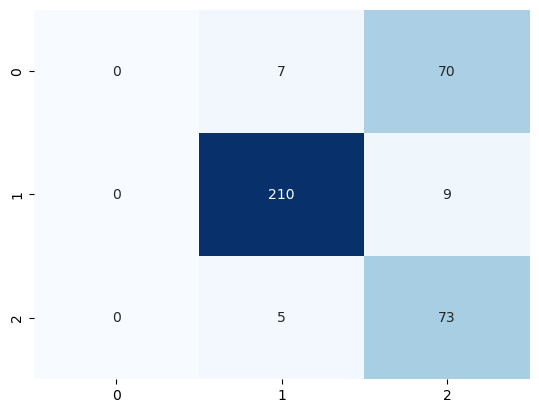

In [402]:
cm = confusion_matrix(target, preds)
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues", cbar=False)

In [403]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)
path= root / "customFFN.pth"

In [404]:
torch.save(custom_model,path)

# prediction functions

### for clasical machinelearning

In [405]:
data

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,-1.753096,2,-1.298887,6,-0.825418,6,2,-0.304627,1.654719,-1.298887,1
1,1,-1.637643,3,-1.173036,6,0.039844,8,3,-0.594527,1.170474,-1.173036,1
2,1,-1.637643,3,-1.173036,6,0.039844,8,3,-0.594527,1.170474,-1.173036,1
3,1,-1.637643,5,-1.550588,4,-1.402260,8,1,1.217347,3.591698,-1.550588,2
4,1,-1.637643,5,-1.550588,4,-1.402260,8,1,1.217347,3.591698,-1.550588,2
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127,2
370,0,1.941401,3,1.092276,9,0.760896,3,2,1.579722,-0.524383,1.092276,2
371,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127,2
372,0,1.941401,3,1.218127,9,0.760896,3,2,1.579722,-0.524383,1.218127,2


In [409]:
data.groupby('Quality_of_Sleep')['Quality_of_Sleep'].count()

Quality_of_Sleep
4      5
5      7
6    105
7     77
8    109
9     71
Name: Quality_of_Sleep, dtype: int64

In [423]:
def pred_clasical(model_path):
    import numpy as np
    from joblib import load
    
    model = load(model_path)
    
    Gender=int(input("enter Gender for male '1' & felmale 0 : "))
    Age=float(input("enter Age : "))
    
    print("\nOccupation_Categorys->\n",
          "business_finance_administration: 0 \n",
         "education_research: 1 \n",
         "engineering_technology: 2 \n",
         "healthcare_life_sciences: 3 \n",
         "legal_governance: 4 \n",
         "sales_marketing_commerce: 5 \n")
    
    Occupation=int(input("enter Occupation : "))
    Sleep_Duration=float(input("enter Sleep_Duration  : "))
    Quality_of_Sleep=int(input("enter Quality_of_Sleep form 3 to 9 : "))
    Physical_Activity_Level=float(input("enter Physical_Activity_Level % form 30 to 100 : "))
    Stress_Level=int(input("enter Stress_Level form 1 to 10 : "))

    print("\nBMI_Categorys->\n",
          "normal weight: 0 \n",
          "obesity: 1 \n",
          "overweight: 2 \n",
          "underweight: 3 \n")
 
    BMI_Category=int(input("enter BMI_Category : "))
    
    Blood_Pressure=float(input("enter avg Blood_Pressure : "))
    Heart_Rate=float(input("enter Heart_Rate : "))
    Daily_Steps=int(input("enter Daily_Steps : "))
    
    feat = np.zeros(11)

    feat[0] = Gender
    feat[1] = Age
    feat[2] = Occupation
    feat[3] = Sleep_Duration
    feat[4] = Quality_of_Sleep
    feat[5] = Physical_Activity_Level
    feat[6] = Stress_Level
    feat[7] = BMI_Category
    feat[8] = Blood_Pressure
    feat[9] = Heart_Rate
    feat[10] = Daily_Steps
    
    feat = feat.reshape(1, -1)
    
    resdict={0: 'Insomnia',1: 'No_desease' , 2:"Sleep Apnea"}
    
    prediction = model.predict(feat)
    if prediction<0:
        prediction=0
    print("\n","prediction: ", resdict[ int(prediction[0])],"\n",)
    return prediction


In [424]:
from pathlib import Path
root=Path('models')
root.mkdir(exist_ok=True)

In [430]:
# pread form atucal data
preaad=pred_clasical(model_path=str(root / "SVC.pkl"))
preaad

enter Gender for male '1' & felmale 0 :  0
enter Age :  53



Occupation_Categorys->
 business_finance_administration: 0 
 education_research: 1 
 engineering_technology: 2 
 healthcare_life_sciences: 3 
 legal_governance: 4 
 sales_marketing_commerce: 5 



enter Occupation :  2
enter Sleep_Duration  :  8.5
enter Quality_of_Sleep form 3 to 9 :  9
enter Physical_Activity_Level % form 30 to 100 :  30
enter Stress_Level form 1 to 10 :  3



BMI_Categorys->
 normal weight: 0 
 obesity: 1 
 overweight: 2 
 underweight: 3 



enter BMI_Category :  3
enter avg Blood_Pressure :  102.5
enter Heart_Rate :  65
enter Daily_Steps :  5000



 prediction:  Sleep Apnea 



array([2])

In [ ]:
Female	53	Engineer	8.5	9	30	3	Normal	125/80	65	5000	No


In [429]:
# pread form atucal data
preaad=pred_clasical(model_path=str(root / "LogisticRegression.pkl"))
preaad

enter Gender for male '1' & felmale 0 :  1
enter Age :  28



Occupation_Categorys->
 business_finance_administration: 0 
 education_research: 1 
 engineering_technology: 2 
 healthcare_life_sciences: 3 
 legal_governance: 4 
 sales_marketing_commerce: 5 



enter Occupation :  3
enter Sleep_Duration  :  6.2
enter Quality_of_Sleep form 3 to 9 :  6
enter Physical_Activity_Level % form 30 to 100 :  60
enter Stress_Level form 1 to 10 :  8



BMI_Categorys->
 normal weight: 0 
 obesity: 1 
 overweight: 2 
 underweight: 3 



enter BMI_Category :  3
enter avg Blood_Pressure :  102.5
enter Heart_Rate :  75
enter Daily_Steps :  10000



 prediction:  Sleep Apnea 



array([2])

In [ ]:
1	28	3	6.2	6	60	8	3	102.5	75	10000	1

In [410]:
def pred_clasical(model_path):
    import numpy as np
    from joblib import load
    
    model = load(model_path)
    
    Gender=int(input("enter Gender for male '1' & felmale 0 : "))
    Age=float(input("enter Age : "))
    
    print("business_finance_administration: 0 \n",
         "education_research: 1 \n",
         "engineering_technology: 2 \n",
         "healthcare_life_sciences: 3 \n",
         "legal_governance: 4 \n",
         "sales_marketing_commerce: 5 \n")
    
    Occupation=int(input("enter Occupation : "))
    Sleep_Duration=float(input("enter Sleep_Duration  : "))
    Quality_of_Sleep=int(input("enter Quality_of_Sleep form 3 to 9 : "))
    Physical_Activity_Level=float(input("enter Physical_Activity_Level % form 30 to 100 : "))
    Stress_Level=int(input("enter Stress_Level form 1 to 10 : "))

    print("normal weight: 0 \n",
          "obesity: 1 \n",
          "overweight: 2 \n",
          "underweight: 3 \n")
 
    BMI_Category=int(input("enter BMI_Category : "))
    
    Blood_Pressure=float(input("enter avg Blood_Pressure : "))
    Heart_Rate=float(input("enter Heart_Rate : "))
    Daily_Steps=int(input("enter Daily_Steps : "))
    
    feat = np.zeros(11)

    feat[0] = Gender
    feat[1] = Age
    feat[2] = Occupation
    feat[3] = Sleep_Duration
    feat[4] = Quality_of_Sleep
    feat[5] = Physical_Activity_Level
    feat[6] = Stress_Level
    feat[7] = BMI_Category
    feat[8] = Blood_Pressure
    feat[9] = Heart_Rate
    feat[10] = Daily_Steps
    
    feat = feat.reshape(1, -1)

    prediction = model.predict(xi)
    if prediction<0:
        prediction=0
    return prediction
